# Applications of Machine Learning Techniques in Fraudulent Transactions over the Ethereum Blockchain and Identifying the Most Contributing Features 

# 1. Importing Data
# 2. Exploratory Data Analysis
# 3. Data Cleaning
# 4. Train Test Split
# 5. Feature Scaling
# 6. Feature Selection
# 7. Resampling
# 8. Hyperparameter Tuning
# 9. Fitting  Models and Metrics
# 10. Shapley Values
# 11. Threshold Selection Using ROC Curve
# 12. Appendix Code

In [4]:
# Importing packages into notebook for analysis tools

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import ttest_ind
import pylab
import math
import missingno as msno
from matplotlib.colors import LinearSegmentedColormap
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas_profiling
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, plot_confusion_matrix
from sklearn.metrics import log_loss,r2_score,accuracy_score,matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler,PowerTransformer,MinMaxScaler
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import RandomOverSampler
from imblearn import under_sampling, over_sampling
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import shap
from shap import TreeExplainer, summary_plot

# 1. Importing Data

In [5]:
myfile='transaction_dataset.csv'

In [6]:
df = pd.read_csv(myfile,index_col=None)
print(df.shape)
df.head()

(9841, 51)


Unnamed: 0  Index                                     Address  FLAG  \
0           0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1           1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2           2      3  0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3           3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4           4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   

   Avg min between sent tnx  Avg min between received tnx  \
0                    844.26                       1093.71   
1                  12709.07                       2958.44   
2                 246194.54                       2434.02   
3                  10219.60                      15785.09   
4                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       721            89   
1                               1218216.73        94             8   
2                                516729.30         2            10   
3                                397555.90        25             9   
4                                382472.42      4598            20   

   Number of Created Contracts  ...   ERC20 min val sent   ERC20 max val sent  \
0                            0  ...             0.000000         1.683100e+07   
1                            0  ...             2.260809         2.260809e+00   
2                            0  ...             0.000000         0.000000e+00   
3                            0  ...           100.000000         9.029231e+03   
4                            1  ...             0.000000         4.500000e+04   

    ERC20 avg val sent   ERC20 min val sent contract  \
0        271779.920000                           0.0   
1             2.260809                           0.0   
2             0.000000                           0.0   
3          3804.076893                           0.0   
4         13726.659220                           0.0   

    ERC20 max val sent contract   ERC20 avg val sent contract  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

    ERC20 uniq sent token name   ERC20 uniq rec token name  \
0                         39.0                        57.0   
1                          1.0                         7.0   
2                          0.0                         8.0   
3                          1.0                        11.0   
4                          6.0                        27.0   

    ERC20 most sent token type   ERC20_most_rec_token_type  
0                    Cofoundit                   Numeraire  
1               Livepeer Token              Livepeer Token  
2                         None                       XENON  
3                       Raiden                       XENON  
4                StatusNetwork                         EOS  

[5 rows x 51 columns]

In [7]:
# Ommit first three columns (Unnamed:0, Index, Adress)
df = df.iloc[:,3:]

# 2. Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

## 2.1 Inspect Categories

In [9]:
#Turn object variables into 'category' dtype for more computation efficiency
categories = df.select_dtypes('O').columns.astype('category')
df[categories]

ERC20 most sent token type         ERC20_most_rec_token_type
0                      Cofoundit                         Numeraire
1                 Livepeer Token                    Livepeer Token
2                           None                             XENON
3                         Raiden                             XENON
4                  StatusNetwork                               EOS
...                          ...                               ...
9836                                                    GSENetwork
9837                                         Blockwell say NOTSAFU
9838                              Free BOB Tokens - BobsRepair.com
9839                         NaN                               NaN
9840                                                    INS Promo1

[9841 rows x 2 columns]

In [10]:
# Inspect categoricals
for i in df[categories].columns:
    print(f'The categorical column {i} has {df[i].nunique()} unique values')

The categorical column  ERC20 most sent token type has 305 unique values
The categorical column  ERC20_most_rec_token_type has 467 unique values


## 2.2 Inspect Numerical Categories

In [11]:
# Inspect numericals
numericals = df.select_dtypes(include=['float64','int64']).columns
df[numericals].describe()

FLAG  Avg min between sent tnx  Avg min between received tnx  \
count  9841.000000               9841.000000                   9841.000000   
mean      0.221421               5086.878721                   8004.851184   
std       0.415224              21486.549974                  23081.714801   
min       0.000000                  0.000000                      0.000000   
25%       0.000000                  0.000000                      0.000000   
50%       0.000000                 17.340000                    509.770000   
75%       0.000000                565.470000                   5480.390000   
max       1.000000             430287.670000                 482175.490000   

       Time Diff between first and last (Mins)      Sent tnx  Received Tnx  \
count                             9.841000e+03   9841.000000   9841.000000   
mean                              2.183333e+05    115.931714    163.700945   
std                               3.229379e+05    757.226361    940.836550   
min                               0.000000e+00      0.000000      0.000000   
25%                               3.169300e+02      1.000000      1.000000   
50%                               4.663703e+04      3.000000      4.000000   
75%                               3.040710e+05     11.000000     27.000000   
max                               1.954861e+06  10000.000000  10000.000000   

       Number of Created Contracts  Unique Received From Addresses  \
count                  9841.000000                     9841.000000   
mean                      3.729702                       30.360939   
std                     141.445583                      298.621112   
min                       0.000000                        0.000000   
25%                       0.000000                        1.000000   
50%                       0.000000                        2.000000   
75%                       0.000000                        5.000000   
max                    9995.000000                     9999.000000   

       Unique Sent To Addresses  min value received  ...   ERC20 max val rec  \
count               9841.000000         9841.000000  ...        9.012000e+03   
mean                  25.840159           43.845153  ...        1.252524e+08   
std                  263.820410          325.929139  ...        1.053741e+10   
min                    0.000000            0.000000  ...        0.000000e+00   
25%                    1.000000            0.001000  ...        0.000000e+00   
50%                    2.000000            0.095856  ...        0.000000e+00   
75%                    3.000000            2.000000  ...        9.900000e+01   
max                 9287.000000        10000.000000  ...        1.000000e+12   

        ERC20 avg val rec   ERC20 min val sent   ERC20 max val sent  \
count        9.012000e+03         9.012000e+03         9.012000e+03   
mean         4.346203e+06         1.174126e+04         1.303594e+07   
std          2.141192e+08         1.053567e+06         1.179905e+09   
min          0.000000e+00         0.000000e+00         0.000000e+00   
25%          0.000000e+00         0.000000e+00         0.000000e+00   
50%          0.000000e+00         0.000000e+00         0.000000e+00   
75%          2.946467e+01         0.000000e+00         0.000000e+00   
max          1.724181e+10         1.000000e+08         1.120000e+11   

        ERC20 avg val sent   ERC20 min val sent contract  \
count         9.012000e+03                        9012.0   
mean          6.318389e+06                           0.0   
std           5.914764e+08                           0.0   
min           0.000000e+00                           0.0   
25%           0.000000e+00                           0.0   
50%           0.000000e+00                           0.0   
75%           0.000000e+00                           0.0   
max           5.614756e+10                           0.0   

        ERC20 max val sent contract   ERC20 avg val sent contract  \
count 

## 2.3 Distribution of Fraudulent Transactions

### 2.3.1 Pie Chart

0    7662
1    2179
Name: FLAG, dtype: int64


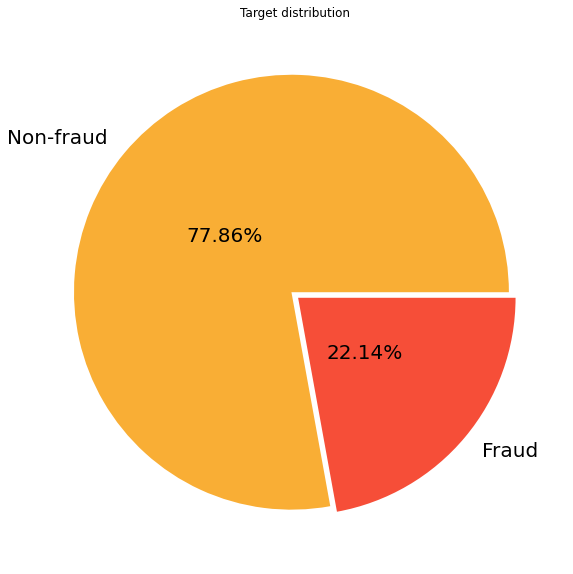

In [12]:
# Inspect target distribution
print(df['FLAG'].value_counts())

pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.4, textprops={'fontsize': 20}, colors = colors)
plt.title('Target distribution')
plt.show()

### 2.3.2 Heat Correlation Map

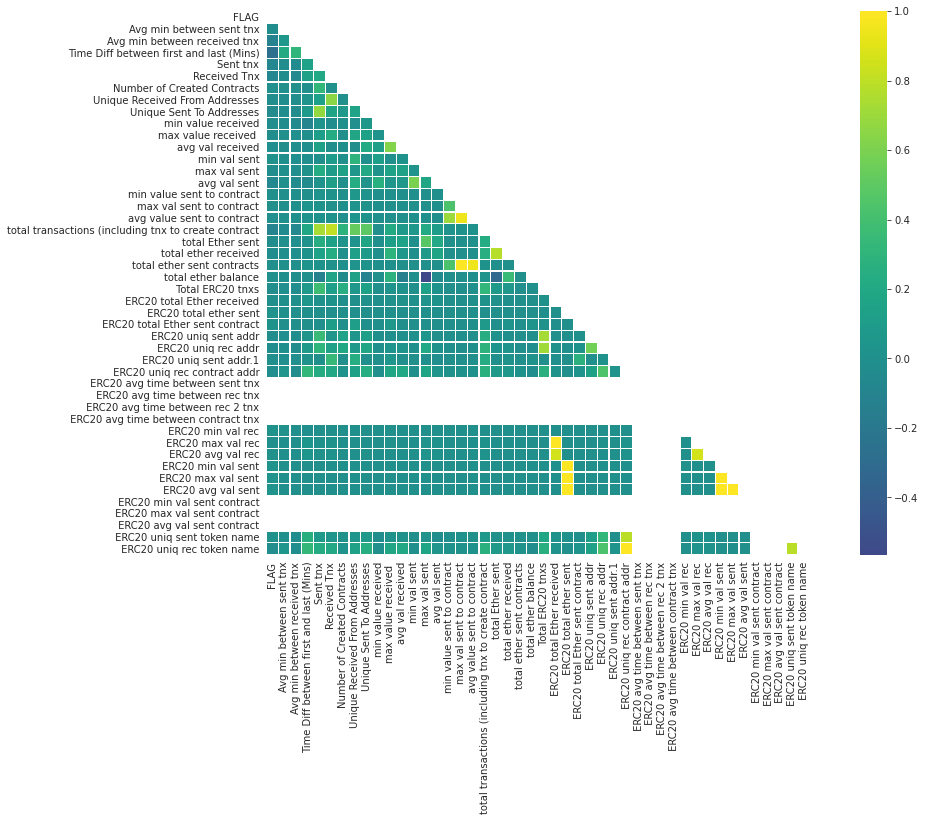

In [13]:
# Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='viridis', center=0, square=True,linewidths=0.25,vmax=1.0)

# 3. Data Cleaning

## 3.1 Null Values 

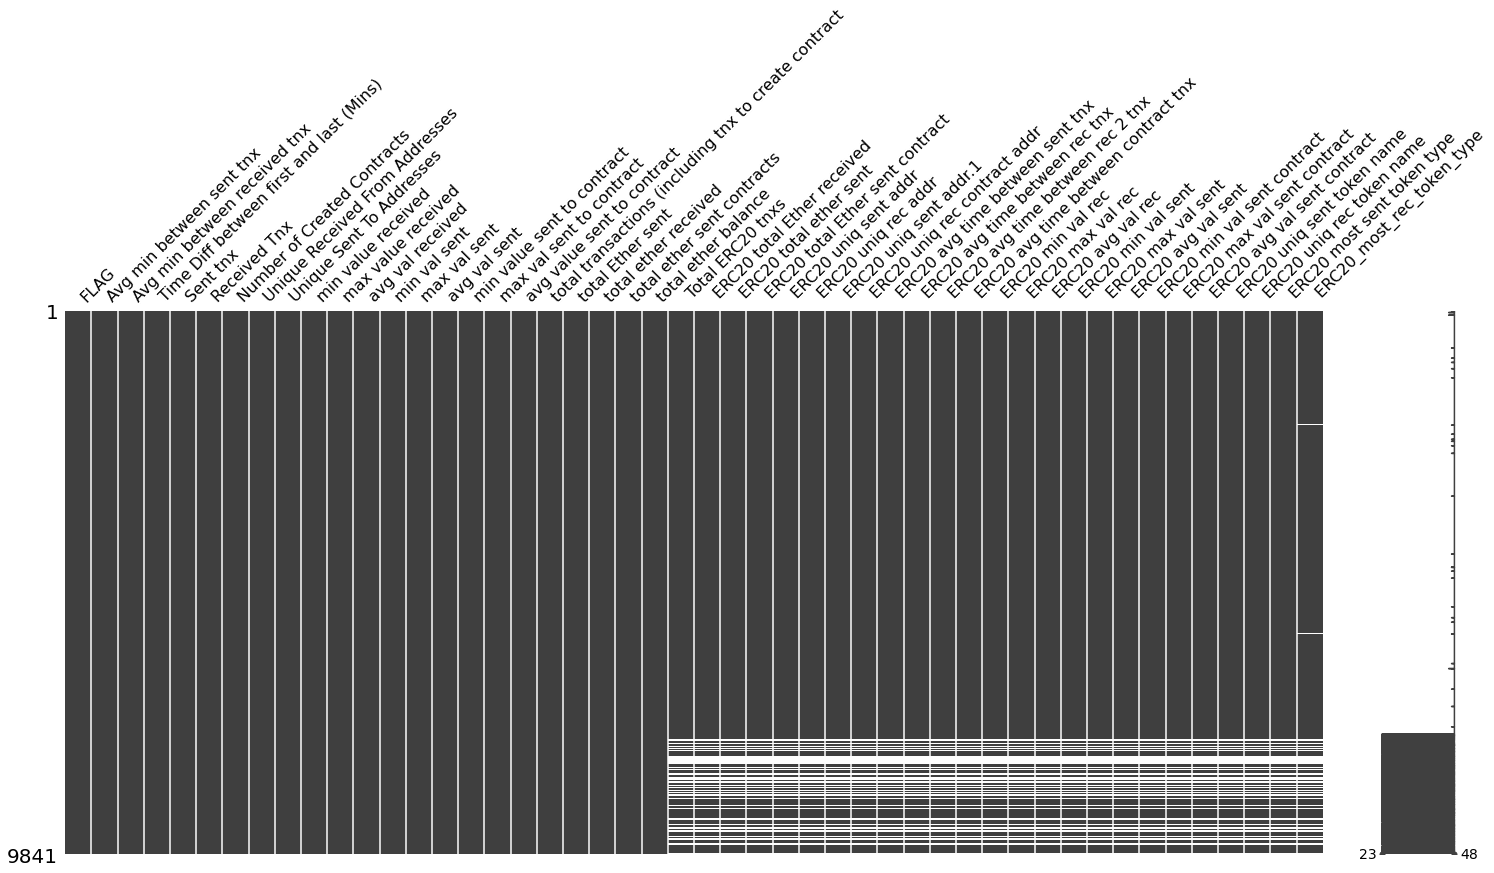

In [14]:
#Null values between columns 26 and 51 
msno.matrix(df);

In [15]:
# Produce a column of all categories showing number of null values in each caloumn
df.isnull().sum() 

FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

## 3.2 Identifying Method for Null Numerical Values

In [16]:
#Select whole data set of numerical values
nums = df[numericals]
nums.head()

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0     0                    844.26                       1093.71   
1     0                  12709.07                       2958.44   
2     0                 246194.54                       2434.02   
3     0                  10219.60                      15785.09   
4     0                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       721            89   
1                               1218216.73        94             8   
2                                516729.30         2            10   
3                                397555.90        25             9   
4                                382472.42      4598            20   

   Number of Created Contracts  Unique Received From Addresses  \
0                            0                              40   
1                            0                               5   
2                            0                              10   
3                            0                               7   
4                            1                               7   

   Unique Sent To Addresses  min value received  ...   ERC20 max val rec  \
0                       118            0.000000  ...        1.500000e+07   
1                        14            0.000000  ...        3.650000e+02   
2                         2            0.113119  ...        4.428198e+02   
3                        13            0.000000  ...        1.141223e+04   
4                        19            0.000000  ...        9.000000e+04   

    ERC20 avg val rec   ERC20 min val sent   ERC20 max val sent  \
0       265586.147600             0.000000         1.683100e+07   
1           57.632615             2.260809         2.260809e+00   
2           65.189009             0.000000         0.000000e+00   
3         1555.550174           100.000000         9.029231e+03   
4         4934.232147             0.000000         4.500000e+04   

    ERC20 avg val sent   ERC20 min val sent contract  \
0        271779.920000                           0.0   
1             2.260809                           0.0   
2             0.000000                           0.0   
3          3804.076893                           0.0   
4         13726.659220                           0.0   

    ERC20 max val sent contract   ERC20 avg val sent contract  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

    ERC20 uniq sent token name   ERC20 uniq rec token name  
0                         39.0                        57.0  
1                          1.0                         7.0  
2                          0.0                         8.0  
3                          1.0                        11.0  
4                          6.0                        27.0  

[5 rows x 46 columns]

### 3.2.1 Simple Imputer

In [17]:
#Split nums into train and test
test_num = nums['FLAG']
train_num = nums.drop('FLAG',axis=1)

In [194]:
#Set regressor to BayesianRidge()
br_estimator = BayesianRidge()

#Number of splits
N_SPLITS = 5

# Estimate the score after imputation (mean and median strategies)
score_simple_imputer = pd.DataFrame()

# Iterating over mean and median methods
for strategy in ('mean', 'median'):
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy),
        bf_estimator)
    
    #Evaluate Score
    score_simple_imputer[strategy] = cross_val_score(
        estimator, train_num,test_num, scoring='neg_mean_squared_error',
        cv=N_SPLITS)

### 3.2.2 Iterative Imputer 

In [195]:
#Iterate over BayesianRidge, DecisionTreeRegressor, ExtraTreesRegressor, KNeighborsRegressor
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
    KNeighborsRegressor(n_neighbors=15)]
    
score_iterative_imputer = pd.DataFrame()
for impute_estimator in estimators:
    estimator = make_pipeline(
        IterativeImputer(random_state=0, estimator=impute_estimator),
        br_estimator)
    
    score_iterative_imputer[impute_estimator.__class__.__name__] = \
        cross_val_score(
            estimator, train_num, test_num, scoring='neg_mean_squared_error',
            cv=N_SPLITS)

[IterativeImputer] Early stopping criterion not reached.
[IterativeImputer] Early stopping criterion not reached.


In [196]:
score_iterative_imputer

BayesianRidge  DecisionTreeRegressor  ExtraTreesRegressor  \
0      -0.494792              -0.513886            -0.254953   
1      -0.086433              -0.062019            -0.048165   
2      -0.121144              -0.093344            -0.055307   
3      -0.112282              -0.142288            -0.127556   
4      -0.939944              -0.984679            -0.912558   

   KNeighborsRegressor  
0            -0.207060  
1            -0.056727  
2            -0.444816  
3            -0.073087  
4            -0.853592

### 3.2.3 Imputer Techniques Plot

In [197]:
scores = pd.concat([score_simple_imputer,score_iterative_imputer],
                   keys=['SimpleImputer', 'IterativeImputer'], axis=1)

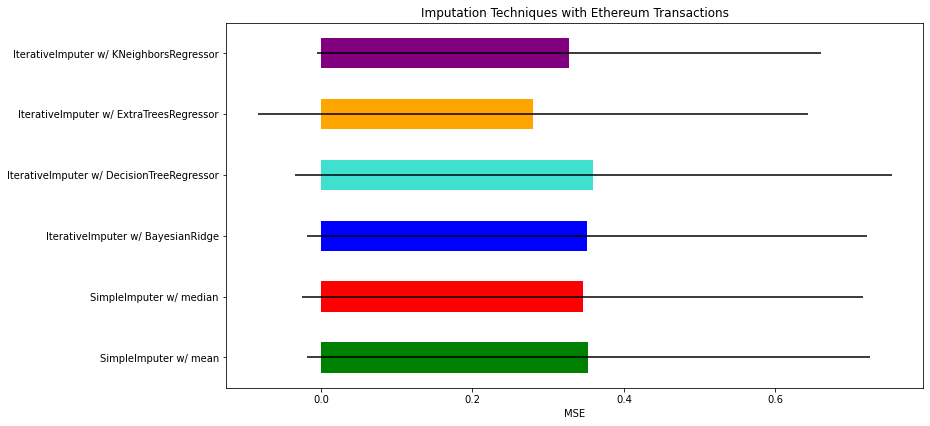

In [198]:
# plot ethereum transaction results
fig, ax = plt.subplots(figsize=(13, 6))
colors = ['g','r' ,'b','turquoise','orange','purple']
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax,color=colors)
ax.set_title('Imputation Techniques with Ethereum Transactions')
ax.set_xlabel('MSE')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels([" w/ ".join(label) for label in means.index.tolist()])
plt.tight_layout(pad=1)
plt.show()

In [23]:
scores = pd.concat([score_simple_imputer,score_iterative_imputer],axis=1)
scores.mean()

mean                    -0.547968
median                  -0.522352
BayesianRidge           -0.547878
DecisionTreeRegressor   -0.473276
ExtraTreesRegressor     -0.402273
KNeighborsRegressor     -0.428411
dtype: float64

### 3.2.5 Iterative Imputer (Extratreesregressor) of Final Numerical Values

In [24]:
#Discovered that iterative imputer with (Extratreesregressor works best for imputing the dataset

#define imputer
imputer = IterativeImputer(ExtraTreesRegressor(n_estimators=10, random_state=0))

# fit and transform on the dataset
num_trans = imputer.fit_transform(nums)

In [25]:
#Turn nums into a dataframe
num_iter = pd.DataFrame(num_trans,columns=list(nums.columns))

#Combine numerical and categorical variables
frames = [num_iter]
combined = pd.concat(frames,axis=1)
combined.head(5)

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0   0.0                    844.26                       1093.71   
1   0.0                  12709.07                       2958.44   
2   0.0                 246194.54                       2434.02   
3   0.0                  10219.60                      15785.09   
4   0.0                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63     721.0          89.0   
1                               1218216.73      94.0           8.0   
2                                516729.30       2.0          10.0   
3                                397555.90      25.0           9.0   
4                                382472.42    4598.0          20.0   

   Number of Created Contracts  Unique Received From Addresses  \
0                          0.0                            40.0   
1                          0.0                             5.0   
2                          0.0                            10.0   
3                          0.0                             7.0   
4                          1.0                             7.0   

   Unique Sent To Addresses  min value received  ...   ERC20 max val rec  \
0                     118.0            0.000000  ...        1.500000e+07   
1                      14.0            0.000000  ...        3.650000e+02   
2                       2.0            0.113119  ...        4.428198e+02   
3                      13.0            0.000000  ...        1.141223e+04   
4                      19.0            0.000000  ...        9.000000e+04   

    ERC20 avg val rec   ERC20 min val sent   ERC20 max val sent  \
0       265586.147600             0.000000         1.683100e+07   
1           57.632615             2.260809         2.260809e+00   
2           65.189009             0.000000         0.000000e+00   
3         1555.550174           100.000000         9.029231e+03   
4         4934.232147             0.000000         4.500000e+04   

    ERC20 avg val sent   ERC20 min val sent contract  \
0        271779.920000                           0.0   
1             2.260809                           0.0   
2             0.000000                           0.0   
3          3804.076893                           0.0   
4         13726.659220                           0.0   

    ERC20 max val sent contract   ERC20 avg val sent contract  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

    ERC20 uniq sent token name   ERC20 uniq rec token name  
0                         39.0                        57.0  
1                          1.0                         7.0  
2                          0.0                         8.0  
3                          1.0                        11.0  
4                          6.0                        27.0  

[5 rows x 46 columns]

In [26]:
combined.isnull().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

# 4. Train Test Split

In [27]:
#Set up new columns and 
Target = num_iter['FLAG'].astype(int)
Columns = num_iter.drop('FLAG', axis=1)

# Split data into train test split
X_train, X_test, y_train, y_test = train_test_split(Columns, Target, test_size=0.2, random_state=42)

# 5. Feature Scaling

## 5.1 Normalization

In [28]:
# fit scaler on training data
norm = MinMaxScaler()

# transform training data
X_train_norm = norm.fit_transform(X_train)

# transform testing dataa
X_test_norm = norm.transform(X_test)

## 5.2 Standardization

In [29]:
# fit on training data column
scale = StandardScaler()
    
# transform the training data column
X_train_stand = scale.fit_transform(X_train)
    
# transform the testing data column
X_test_stand = scale.transform(X_test)

## 5.3 Non-linear Transformation

In [30]:
# fit on training data column
power = PowerTransformer()
    
# transform the training data column
X_train_power = power.fit_transform(X_train)
    
# transform the testing data column
X_test_power = power.transform(X_test)

divide by zero encountered in log


## 5.4 Outlier Scaling

In [31]:
#Fit robustscalar on training data
robust = RobustScaler()

# transform the training data column
X_train_robust = robust.fit_transform(X_train)

# transform the testing data column
X_test_robust = robust.transform(X_test)

## 5.5 Applying Scaling to K-Nearest Neighbours

In [32]:
#Set knn classifier
knn_class = KNeighborsClassifier(n_neighbors=4)

# MSE list
MSE_knn = []

# original, normalized, standardized robustscalar, powertransformer, training and testing data
Training_Features = [X_train, X_train_norm, X_train_stand, X_train_power, X_train_robust]
Testing_Features = [X_test, X_test_norm, X_test_stand, X_test_power, X_test_robust]

# model fitting and measuring MSE
for i in range(len(Training_Features)):
    # fit
    knn_class.fit(Training_Features[i],y_train)
    # predict
    pred = knn_class.predict(Testing_Features[i])
    # MSE
    MSE_knn.append(mean_squared_error(y_test,pred))
    
# visualizing the result
df_knn = pd.DataFrame({'KNN MSE':MSE_knn},index=['Original','Normalized','Standardized','Powertransformer','Robustscalar'])
df_knn

KNN MSE
Original          0.085322
Normalized        0.050279
Standardized      0.039106
Powertransformer  0.029457
Robustscalar      0.053834

## 5.6 Applying Scaling to Logistic Regression

In [33]:
#Set decisiontree classifier
LR = LogisticRegression()
# MSE list
MSE_lr = []

# model fitting and measuring MSE
for i in range(len(Training_Features)):
    
    # fit
    LR.fit(Training_Features[i],y_train)
    # predict
    pred = LR.predict(X_test)
    # MSE
    MSE_lr.append(mean_squared_error(y_test,pred))
    
# visualizing the result
df_lr = pd.DataFrame({'Logistic MSE':MSE_lr},index=['Original','Normalized','Standardized','Powertransformer','Robustscalar'])
df_lr

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Logistic MSE
Original              0.103606
Normalized            0.114779
Standardized          0.135094
Powertransformer      0.207720
Robustscalar          0.221940

## Plot Graph

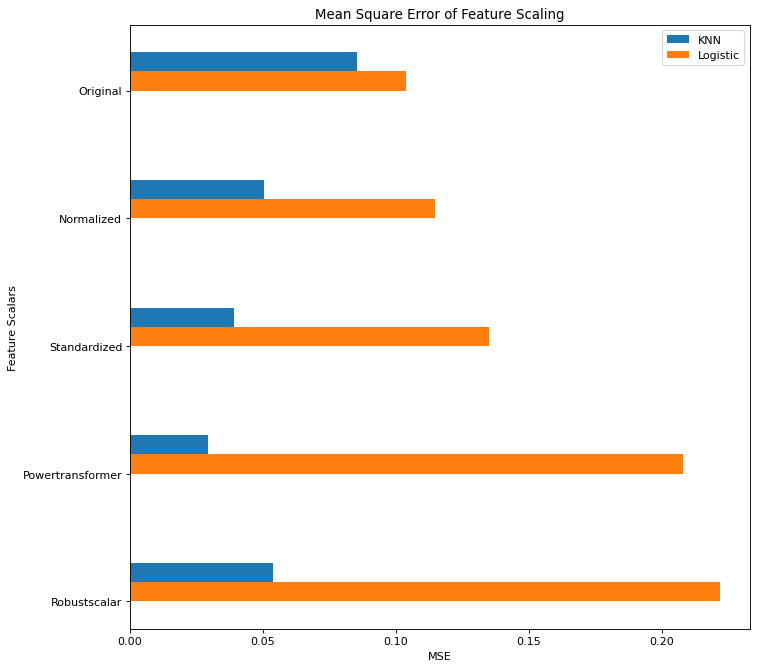

In [34]:
w = 0.15
y = ['Original','Normalized','Standardized','Powertransformer','Robustscalar']

figure(figsize=(10, 10), dpi=80)
KNN = list(df_knn['KNN MSE'].values)
Logistic = list(df_lr['Logistic MSE'].values)

bar1 = np.arange(len(y))
bar2 = [i+w for i in bar1]

plt.barh(bar1, KNN, w, label='KNN')
plt.barh(bar2, Logistic, w, label='Logistic')

plt.xlabel('MSE')
plt.ylabel('Feature Scalars')
plt.yticks(bar1+1.5*w,y)
plt.title('Mean Square Error of Feature Scaling')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

# 6. Feature Selection

## 6.1 Zero Variance Removal

In [35]:
X_train_norm = pd.DataFrame(X_train_norm ,columns=list(X_train.columns))
X_test_norm = pd.DataFrame(X_test_norm,columns=list(X_test.columns))

In [36]:
# Filtering the features with 0 variance
no_var = X_train_norm.var() == 0
print(X_train_norm.var()[no_var])
print('\n')

min value sent to contract              0.0
 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64




In [37]:
# Drop features with 0 variance --- these features will not help in the performance of the model
X_train_norm.drop(X_train_norm.var()[no_var].index, axis = 1, inplace = True)
print('Dimension of new training data is: {}'.format(X_train_norm.shape))

Dimension of new training data is: (7872, 37)


## 6.2 Multicollinearity Removal

In [38]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [39]:
corr_features = correlation(X_train_norm, 0.9)
len(set(corr_features))

7

In [40]:
corr_features

{' ERC20 avg val sent',
 ' ERC20 max val rec',
 ' ERC20 max val sent',
 ' ERC20 min val sent',
 ' ERC20 uniq rec token name',
 'avg value sent to contract',
 'total ether sent contracts'}

In [41]:
# Drop 
Corr_removal = X_train_norm.drop(corr_features,axis=1)

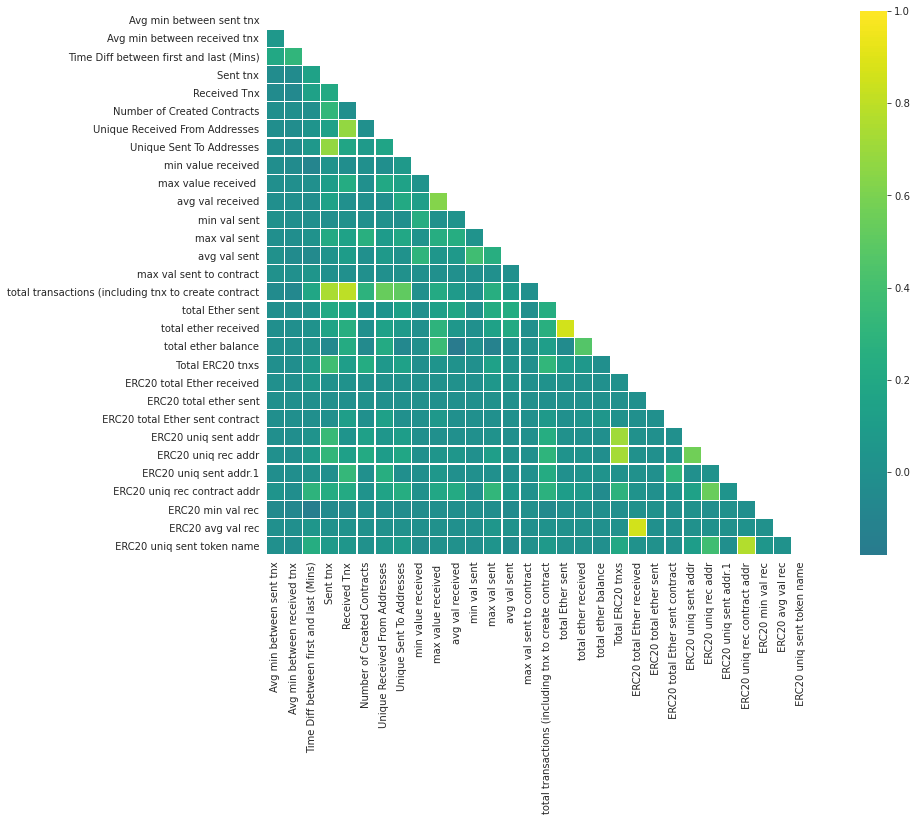

In [42]:
# Correlation matrix
# Reduce multicolinearity
corr1 = Corr_removal.corr()

mask = np.zeros_like(corr1)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr1,  mask=mask, annot=False, cmap='viridis', center=0, square=True, linewidths=0.25,vmax=1.0)

In [43]:
# Some features present a small distribution
for i in Corr_removal.columns[1:]:
    if len(Corr_removal[i].value_counts()) < 5:
        print(f'The column {i} has the following distribution: \n{Corr_removal[i].value_counts()}')
        print('======================================')

The column max val sent to contract has the following distribution: 
0.0    7871
1.0       1
Name: max val sent to contract, dtype: int64


In [44]:
# Drop feature from train set
Corr_removal.drop('max val sent to contract', axis=1, inplace=True)

# Drop feature from test set
X_test_norm.drop('max val sent to contract', axis=1, inplace=True)

In [45]:
# Zero variance dropped in training set
train_variance = ['min value sent to contract', ' ERC20 avg time between sent tnx',' ERC20 avg time between rec tnx',
' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx', ' ERC20 min val sent contract',        
' ERC20 max val sent contract', ' ERC20 avg val sent contract'] 

# turn corr_featuers set into list - features with high correlation
train_corr_features = list(corr_features)

#Combine both lists together for all 
drop_in_test = train_variance + train_corr_features

# Dropping featuers in test set
Feature_removal_test = X_test_norm.drop(drop_in_test ,axis=1)

## 6.3 Top Features = 25

###  6.3.1 SelectKBest

In [46]:
# then select features using the training set only
selector1 = SelectKBest(k=25)
X_train_K25 = selector1.fit_transform(Corr_removal,y_train)

In [47]:
# fit again a simple gausian regression
Logistic_K25 = LogisticRegression()
Logistic_K25.fit(X_train_K25,y_train)

LogisticRegression()

In [48]:
# select the same features on the test set, predict, and get the test accuracy:
X_test_K25 = selector1.transform(Feature_removal_test)
y_pred1 = Logistic_K25.predict(X_test_K25)

In [49]:
Selectk_25 = roc_auc_score(y_test, y_pred1)
Selectk_25

0.6343361673303627

###  6.3.2 Recursive Feature Elimination (RFE)

In [50]:
#clf = Support_Vec
estimator=DecisionTreeClassifier()

# Select top 25 features
selecting1 = RFE(estimator,n_features_to_select=25)

picked1 = selecting1.fit(Corr_removal,y_train)

In [51]:
X_train_R25 = picked1.transform(Corr_removal)

X_test_R25 = picked1.transform(Feature_removal_test)

In [52]:
Logistic_R25 = LogisticRegression()

Logistic_R25.fit(X_train_R25,y_train)

y_pred2 = Logistic_R25.predict(X_test_R25)

RFE_25 = roc_auc_score(y_test,y_pred2)
RFE_25

0.6343361673303627

## 6.4 Top Features = 20

###  6.4.1 SelectKBest

In [53]:
# then select features using the training set only
selector2 = SelectKBest(k=20)
X_train_K20 = selector2.fit_transform(Corr_removal,y_train)

In [54]:
# fit again a simple gausian regression
Logistic_K20 = LogisticRegression()
Logistic_K20.fit(X_train_K20,y_train)

LogisticRegression()

In [55]:
# select the same features on the test set, predict, and get the test accuracy:
X_test_K20 = selector2.transform(Feature_removal_test)
y_pred3 = Logistic_K20.predict(X_test_K20)

In [56]:
Selectk_20 = roc_auc_score(y_test, y_pred3)
Selectk_20

0.6343361673303627

###  6.4.2 RFE

In [57]:
#clf = GaussianNB()
estimator2=DecisionTreeClassifier()

# Select top 20 features
selecting2 = RFE(estimator2,n_features_to_select=20)

picked2 = selecting2.fit(Corr_removal,y_train)

In [58]:
X_train_R20 = picked2.transform(Corr_removal)

X_test_R20 = picked2.transform(Feature_removal_test)

In [59]:
Logistic_R20 = LogisticRegression()

Logistic_R20.fit(X_train_R20,y_train)

y_pred4 = Logistic_R20.predict(X_test_R20)

RFE_20 = roc_auc_score(y_test,y_pred4)
RFE_20

0.6340119131150579

## 6.5 Top Features = 15

###  6.5.1 SelectKBest

In [60]:
# then select features using the training set only
selector3 = SelectKBest(k=15)
X_train_K15 = selector3.fit_transform(Corr_removal,y_train)

In [61]:
# fit again a simple gausian regression
Logistic_K15 = LogisticRegression()
Logistic_K15.fit(X_train_K15,y_train)

LogisticRegression()

In [62]:
# select the same features on the test set, predict, and get the test accuracy:
X_test_K15 = selector3.transform(Feature_removal_test)
y_pred5 = Logistic_K15.predict(X_test_K15)

In [63]:
Selectk_15 = roc_auc_score(y_test, y_pred5)
Selectk_15

0.6343361673303627

###  6.5.2 RFE

In [64]:
#clf = GaussianNB()
estimator3=DecisionTreeClassifier()

# Select top 15 features
selecting3 = RFE(estimator3,n_features_to_select=15)

picked3 = selecting3.fit(Corr_removal,y_train)

In [65]:
X_train_R15 = picked3.transform(Corr_removal)

X_test_R15 = picked3.transform(Feature_removal_test)

In [66]:
Logistic_R15 = LogisticRegression()

Logistic_R15.fit(X_train_R15,y_train)

y_pred6 = Logistic_R15.predict(X_test_R15)

RFE_15 = roc_auc_score(y_test,y_pred6)
RFE_15

0.6340119131150579

## 6.6 Top Features = 10

###  6.6.1 SelectKBest

In [67]:
# then select features using the training set only
selector4 = SelectKBest(k=10)
X_train_K10 = selector4.fit_transform(Corr_removal,y_train)

In [68]:
# fit again a simple gausian regression
Logistic_K10 = LogisticRegression()
Logistic_K10.fit(X_train_K10,y_train)

LogisticRegression()

In [69]:
# select the same features on the test set, predict, and get the test accuracy:
X_test_K10 = selector4.transform(Feature_removal_test)
y_pred7 = Logistic_K10.predict(X_test_K10)

In [70]:
Selectk_10 = roc_auc_score(y_test, y_pred7)
Selectk_10

0.6343361673303627

###  6.6.2 RFE

In [71]:
#clf = GaussianNB()
estimator4=DecisionTreeClassifier()

# Select top 10 features
selecting4 = RFE(estimator4,n_features_to_select=10)

picked4 = selecting4.fit(Corr_removal,y_train)

In [72]:
X_train_R10 = picked4.transform(Corr_removal)

X_test_R10 = picked4.transform(Feature_removal_test)

In [73]:
Logistic_R10 = LogisticRegression()

Logistic_R10.fit(X_train_R10,y_train)

y_pred8 = Logistic_R10.predict(X_test_R10)

RFE_10 = roc_auc_score(y_test,y_pred8)
RFE_10

0.6343361673303627

###  Plot Graph

In [335]:
# List of different seleckbest features scores
AUC_skb = [Selectk_10, Selectk_15, Selectk_20, Selectk_25]

# Dataframe for SKB 
df_skb = pd.DataFrame({'SKB AUC':AUC_skb},index=['10','15','20','25'])
df_skb

SKB AUC
10  0.649559
15  0.650287
20  0.660954
25  0.650730

In [337]:
# List of different RFE features scores
AUC_rfe = [RFE_10, RFE_15, RFE_20, RFE_25]

# Dataframe for RFE
df_rfe = pd.DataFrame({'RFE AUC':AUC_rfe},index=['10','15','20','25'])
df_rfe

RFE AUC
10  0.649541
15  0.651730
20  0.650405
25  0.651271

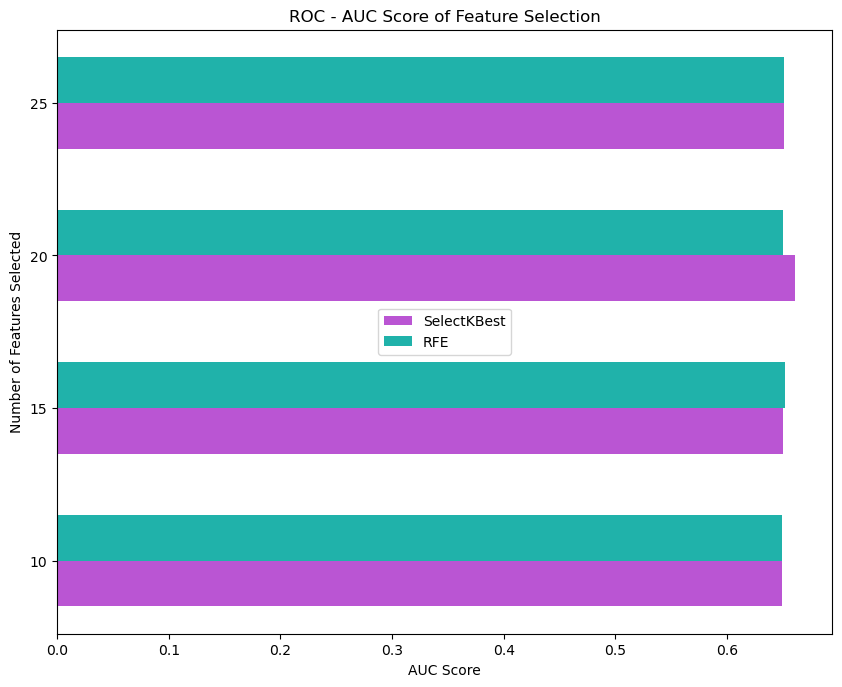

In [338]:
w = 0.3
x = ['10','15','20','25']

figure(figsize=(10,8), dpi=100)
SelectKBest= list(df_skb['SKB AUC'].values)
RFE = list(df_rfe['RFE AUC'].values)

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.barh(bar1, SelectKBest, w, label='SelectKBest',color=['mediumorchid'])
plt.barh(bar2, RFE, w, label='RFE',color=['lightseagreen'])

plt.xlabel('AUC Score')
plt.ylabel('Number of Features Selected')
plt.yticks(bar1+0.5*w,x)
plt.title('ROC - AUC Score of Feature Selection')
plt.legend(loc='center')
plt.show()

# 7. Resampling

In [79]:
#List of columns
columnsy= list(train_K20.columns)

#Before scaling data
before_scaling = df.copy()[df.copy().columns.intersection(columnsy)]  #max val sent

This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


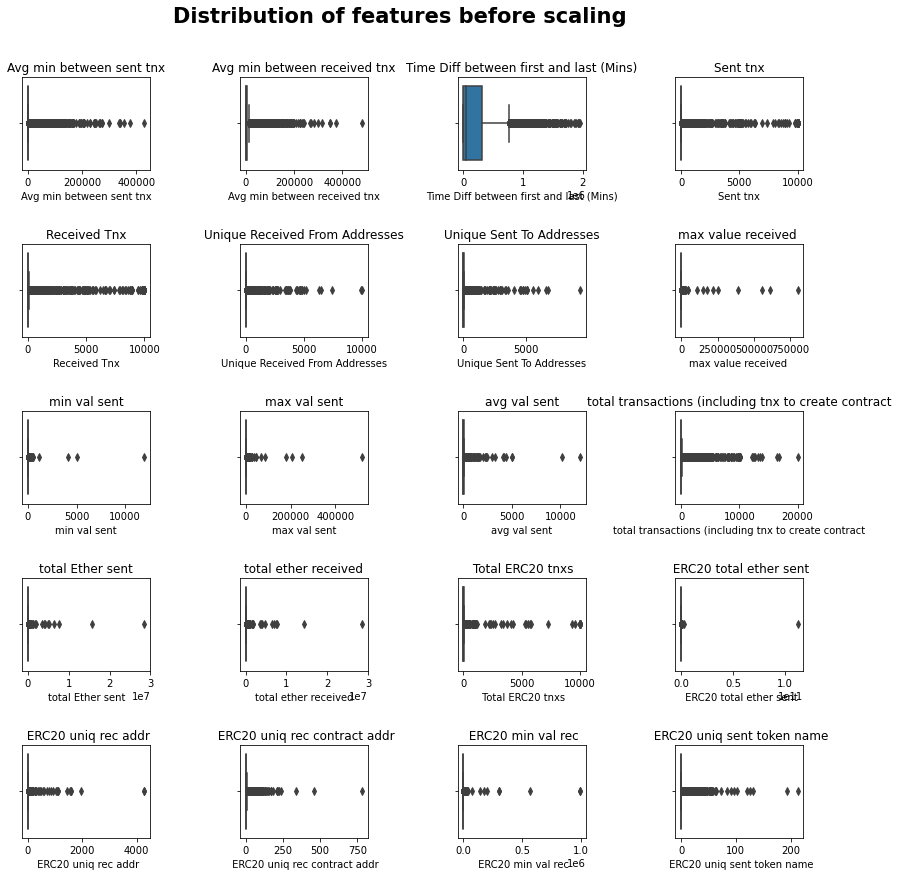

In [80]:
# Distribution of features before scaling
fig, axes = plt.subplots(5, 4, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features before scaling",y=0.95, size=21, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=before_scaling, x=before_scaling.columns[0])
ax.set_title(f'{before_scaling.columns[0]}')

ax = sns.boxplot(ax = axes[0,1], data=before_scaling, x=before_scaling.columns[1])
ax.set_title(f'{before_scaling.columns[1]}')

ax1 = sns.boxplot(ax = axes[0,2], data=before_scaling, x=before_scaling.columns[2])
ax1.set_title(f'{before_scaling.columns[2]}')

ax2 = sns.boxplot(ax = axes[0,3], data=before_scaling, x=before_scaling.columns[3])
ax2.set_title(f'{before_scaling.columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=before_scaling, x=before_scaling.columns[4])
ax3.set_title(f'{before_scaling.columns[4]}')

ax4 = sns.boxplot(ax = axes[1,1], data=before_scaling, x=before_scaling.columns[5])
ax4.set_title(f'{before_scaling.columns[5]}')

ax5 = sns.boxplot(ax = axes[1,2], data=before_scaling, x=before_scaling.columns[6])
ax5.set_title(f'{before_scaling.columns[6]}')

ax6 = sns.boxplot(ax = axes[1,3], data=before_scaling, x=before_scaling.columns[7])
ax6.set_title(f'{before_scaling.columns[7]}')

ax7 = sns.boxplot(ax = axes[2,0], data=before_scaling, x=before_scaling.columns[8])
ax7.set_title(f'{before_scaling.columns[8]}')

ax8 = sns.boxplot(ax = axes[2,1], data=before_scaling, x=before_scaling.columns[9])
ax8.set_title(f'{before_scaling.columns[9]}')

ax9 = sns.boxplot(ax = axes[2,2], data=before_scaling, x=before_scaling.columns[10])
ax9.set_title(f'{before_scaling.columns[10]}')
 
ax10 = sns.boxplot(ax = axes[2,3], data=before_scaling, x=before_scaling.columns[11])
ax10.set_title(f'{before_scaling.columns[11]}')

ax11 = sns.boxplot(ax = axes[3,0], data=before_scaling, x=before_scaling.columns[12])
ax11.set_title(f'{before_scaling.columns[12]}')
 
ax12 = sns.boxplot(ax = axes[3,1], data=before_scaling, x=before_scaling.columns[13])
ax12.set_title(f'{before_scaling.columns[13]}')
 
ax13 = sns.boxplot(ax = axes[3,2], data=before_scaling, x=before_scaling.columns[14])
ax13.set_title(f'{before_scaling.columns[14]}')
 
ax14 = sns.boxplot(ax = axes[3,3], data=before_scaling, x=before_scaling.columns[15])
ax14.set_title(f'{before_scaling.columns[15]}')
 
ax15 = sns.boxplot(ax = axes[4,0], data=before_scaling, x=before_scaling.columns[16])
ax15.set_title(f'{before_scaling.columns[16]}')
 
ax16 = sns.boxplot(ax = axes[4,1],data=before_scaling, x=before_scaling.columns[17])
ax16.set_title(f'{before_scaling.columns[17]}')
 
ax17 = sns.boxplot(ax = axes[4,2], data=before_scaling, x=before_scaling.columns[18])
ax17.set_title(f'{before_scaling.columns[18]}')

ax18 = sns.boxplot(ax = axes[4,3], data=before_scaling, x=before_scaling.columns[19])
ax18.set_title(f'{before_scaling.columns[19]}')

plt.show()

This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


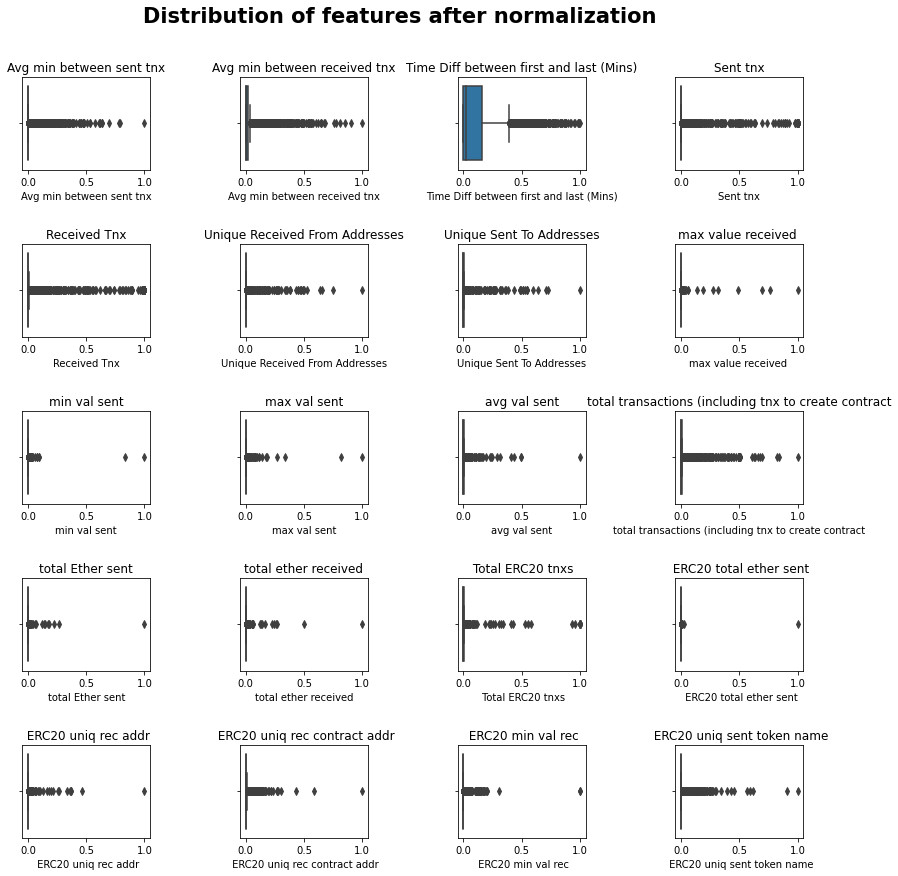

In [81]:
# Distribution of features before scaling
fig, axes = plt.subplots(5, 4, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features after normalization",y=0.95, size=21, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=train_K20, x=train_K20.columns[0])
ax.set_title(f'{train_K20.columns[0]}')

ax = sns.boxplot(ax = axes[0,1], data=train_K20, x=train_K20.columns[1])
ax.set_title(f'{train_K20.columns[1]}')

ax1 = sns.boxplot(ax = axes[0,2], data=train_K20, x=train_K20.columns[2])
ax1.set_title(f'{train_K20.columns[2]}')

ax2 = sns.boxplot(ax = axes[0,3], data=train_K20, x=train_K20.columns[3])
ax2.set_title(f'{train_K20.columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=train_K20, x=train_K20.columns[4])
ax3.set_title(f'{train_K20.columns[4]}')

ax4 = sns.boxplot(ax = axes[1,1], data=train_K20, x=train_K20.columns[5])
ax4.set_title(f'{train_K20.columns[5]}')

ax5 = sns.boxplot(ax = axes[1,2], data=train_K20, x=train_K20.columns[6])
ax5.set_title(f'{train_K20.columns[6]}')

ax6 = sns.boxplot(ax = axes[1,3], data=train_K20, x=train_K20.columns[7])
ax6.set_title(f'{train_K20.columns[7]}')

ax7 = sns.boxplot(ax = axes[2,0], data=train_K20, x=train_K20.columns[8])
ax7.set_title(f'{train_K20.columns[8]}')

ax8 = sns.boxplot(ax = axes[2,1], data=train_K20, x=train_K20.columns[9])
ax8.set_title(f'{train_K20.columns[9]}')

ax9 = sns.boxplot(ax = axes[2,2], data=train_K20, x=train_K20.columns[10])
ax9.set_title(f'{train_K20.columns[10]}')
 
ax10 = sns.boxplot(ax = axes[2,3], data=train_K20, x=train_K20.columns[11])
ax10.set_title(f'{train_K20.columns[11]}')

ax11 = sns.boxplot(ax = axes[3,0], data=train_K20, x=train_K20.columns[12])
ax11.set_title(f'{train_K20.columns[12]}')
 
ax12 = sns.boxplot(ax = axes[3,1], data=train_K20, x=train_K20.columns[13])
ax12.set_title(f'{train_K20.columns[13]}')
 
ax13 = sns.boxplot(ax = axes[3,2], data=train_K20, x=train_K20.columns[14])
ax13.set_title(f'{train_K20.columns[14]}')
 
ax14 = sns.boxplot(ax = axes[3,3], data=train_K20, x=train_K20.columns[15])
ax14.set_title(f'{train_K20.columns[15]}')
 
ax15 = sns.boxplot(ax = axes[4,0], data=train_K20, x=train_K20.columns[16])
ax15.set_title(f'{train_K20.columns[16]}')
 
ax16 = sns.boxplot(ax = axes[4,1],data=train_K20, x=train_K20.columns[17])
ax16.set_title(f'{train_K20.columns[17]}')
 
ax17 = sns.boxplot(ax = axes[4,2], data=train_K20, x=train_K20.columns[18])
ax17.set_title(f'{train_K20.columns[18]}')

ax18 = sns.boxplot(ax = axes[4,3], data=train_K20, x=train_K20.columns[19])
ax18.set_title(f'{train_K20.columns[19]}')

plt.show()

## 7.1 Original Set

In [78]:
# Get columns to keep and create new dataframe with those only
colsy = selector2.get_support(indices=True)
names = (Corr_removal.copy().iloc[:,colsy]).columns

# Training data with top 15 features
train_K20 = pd.DataFrame(data=X_train_K20, columns=names)

In [82]:
print('Dimensions of Original set of Features set: {}'.format(train_K20.shape))
print('Dimensions of Original set of Target set: {}'.format(y_train.shape))

Dimensions of Original set of Features set: (7872, 20)
Dimensions of Original set of Target set: (7872,)


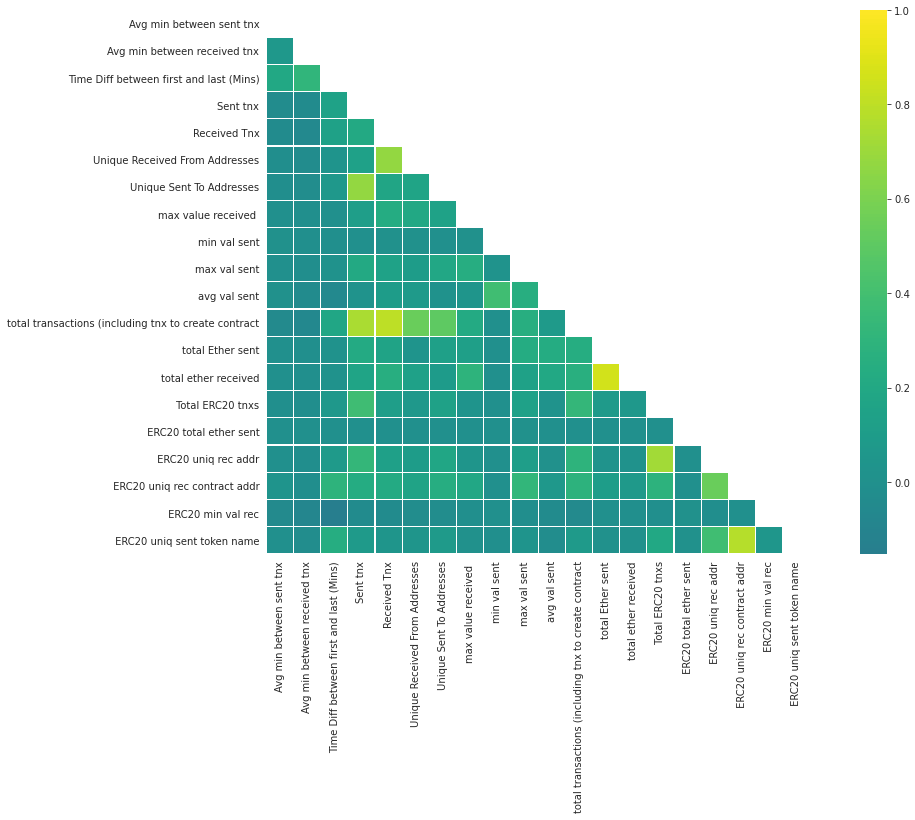

In [83]:
# Correlation matrix
# Reduce multicolinearity
corr1 = train_K20.corr()

mask = np.zeros_like(corr1)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr1,  mask=mask, annot=False, cmap='viridis', center=0, square=True, linewidths=0.25,vmax=1.0)

## 7.2 Random Undersampling

In [84]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
Features_under, Flag_under = nm.fit_resample(train_K20, y_train)

In [85]:
print('Dimensions of Undersampled Features set: {}'.format(Features_under.shape))
print('Dimensions of Undersampled Target set: {}'.format(Flag_under.shape))

Dimensions of Undersampled Features set: (3504, 20)
Dimensions of Undersampled Target set: (3504,)


In [86]:
len(X_test_K20)

1969

## 7.3 Random Oversampling

In [87]:
os = RandomOverSampler(sampling_strategy=0.5)
Features_over, Flag_over = os.fit_resample(train_K20, y_train)

In [88]:
print('Dimensions of Oversampled Features set: {}'.format(Features_over.shape))
print('Dimensions of Oversampled Target set: {}'.format(Flag_over.shape))

Dimensions of Oversampled Features set: (9180, 20)
Dimensions of Oversampled Target set: (9180,)


## 7.4 SMOTE (Synthetic Minority Oversampling Technique) 

In [89]:
# Implementing Oversampling for Handling Imbalanced 
os_smote = SMOTE()
Features_smote, Flag_smote = os_smote.fit_resample(train_K20, y_train)

In [90]:
print('Dimensions of SMOTE Features set: {}'.format(Features_smote.shape))
print('Dimensions of SMOTE Target set: {}'.format(Flag_smote.shape))

Dimensions of SMOTE Features set: (12240, 20)
Dimensions of SMOTE Target set: (12240,)


## 7.5 ADASYN (Adaptive Synthetic Sampling)

In [91]:
# Implementing Oversampling for Handling Imbalanced 
os_adasyn = ADASYN()
Features_adasyn, Flag_adasyn = os_adasyn.fit_resample(train_K20, y_train)

In [92]:
print('Dimensions of ADASYN Features set: {}'.format(Features_adasyn.shape))
print('Dimensions of ADASYN Target set: {}'.format(Flag_adasyn.shape))

Dimensions of ADASYN Features set: (12300, 20)
Dimensions of ADASYN Target set: (12300,)


# 8. Hyperparameter Tuning 

In [93]:
cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)

## 8.1 Logistic Regression

### 8.1.1 Original Set

In [94]:
# define the model
model_lr1 = LogisticRegression()

# define search space
time = dict()
time['C'] = [0.001,0.01,0.1,1,10]
time['penalty'] = ['l2']

# define search
searching1 = GridSearchCV(estimator=model_lr1, param_grid=time , scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True,verbose = 0)

# Results
searching1.fit(train_K20, y_train)
searching1.best_params_

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 10, 'penalty': 'l2'}

In [95]:
LR_set1 = pd.DataFrame(searching1.cv_results_)
LR_set1[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False)

params  mean_test_score
4     {'C': 10, 'penalty': 'l2'}         0.840320
3      {'C': 1, 'penalty': 'l2'}         0.833969
0  {'C': 0.001, 'penalty': 'l2'}         0.777439
1   {'C': 0.01, 'penalty': 'l2'}         0.777439
2    {'C': 0.1, 'penalty': 'l2'}         0.777185

### 8.1.2 Random Undersampling

In [96]:
# define the model
model_lr2 = LogisticRegression()

# define search
searching2 = GridSearchCV(model_lr2, time , scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

# Results
searching2.fit(Features_under, Flag_under)
searching2.best_params_

{'C': 10, 'penalty': 'l2'}

In [97]:
LR_set2 = pd.DataFrame(searching2.cv_results_)
LR_set2[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False)

params  mean_test_score
4     {'C': 10, 'penalty': 'l2'}         0.790524
3      {'C': 1, 'penalty': 'l2'}         0.758278
2    {'C': 0.1, 'penalty': 'l2'}         0.755142
1   {'C': 0.01, 'penalty': 'l2'}         0.584730
0  {'C': 0.001, 'penalty': 'l2'}         0.480022

### 8.1.3 Random Oversampling

In [98]:
# define the model
model_lr3 = LogisticRegression()

# define search
searching3 = GridSearchCV(model_lr3, time , scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

# Results
searching3.fit(Features_over, Flag_over)
searching3.best_params_

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 10, 'penalty': 'l2'}

In [99]:
LR_set3 = pd.DataFrame(searching3.cv_results_)
LR_set3[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False)

params  mean_test_score
4     {'C': 10, 'penalty': 'l2'}         0.761002
3      {'C': 1, 'penalty': 'l2'}         0.757516
2    {'C': 0.1, 'penalty': 'l2'}         0.747059
0  {'C': 0.001, 'penalty': 'l2'}         0.666667
1   {'C': 0.01, 'penalty': 'l2'}         0.666667

### 8.1.4 SMOTE

In [100]:
# define the model
model_lr4 = LogisticRegression()

# define search
searching4 = GridSearchCV(model_lr4, time , scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

# Results
searching4.fit(Features_smote, Flag_smote)
searching4.best_params_

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

{'C': 10, 'penalty': 'l2'}

In [101]:
LR_set4 = pd.DataFrame(searching4.cv_results_)
LR_set4[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False)

params  mean_test_score
4     {'C': 10, 'penalty': 'l2'}         0.709967
3      {'C': 1, 'penalty': 'l2'}         0.702778
2    {'C': 0.1, 'penalty': 'l2'}         0.679248
0  {'C': 0.001, 'penalty': 'l2'}         0.675408
1   {'C': 0.01, 'penalty': 'l2'}         0.672876

### 8.1.5  ADASYN

In [102]:
# define the model
model_lr5 = LogisticRegression()

# define search
searching5 = GridSearchCV(model_lr5, time , scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

# Results
searching5.fit(Features_adasyn, Flag_adasyn)
searching5.best_params_

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

{'C': 10, 'penalty': 'l2'}

In [103]:
LR_set5 = pd.DataFrame(searching5.cv_results_)
LR_set5[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False)

params  mean_test_score
4     {'C': 10, 'penalty': 'l2'}         0.647561
3      {'C': 1, 'penalty': 'l2'}         0.617154
2    {'C': 0.1, 'penalty': 'l2'}         0.615854
1   {'C': 0.01, 'penalty': 'l2'}         0.606341
0  {'C': 0.001, 'penalty': 'l2'}         0.592846

## 8.2 KNN

### 8.2.1 Original Set

In [104]:
# define the model
model_knn1 = KNeighborsClassifier()

# define search space
void = dict()
void['n_neighbors'] = [7,8,9,10,11]
void['leaf_size'] = [10,15,20]

# define search
found1 = GridSearchCV(model_knn1, void, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

# Results
found1.fit(train_K20, y_train)
found1.best_params_

{'leaf_size': 10, 'n_neighbors': 7}

In [105]:
KNN_set1 = pd.DataFrame(found1.cv_results_)
KNN_set1[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False)

params  mean_test_score
0    {'leaf_size': 10, 'n_neighbors': 7}         0.940805
5    {'leaf_size': 15, 'n_neighbors': 7}         0.940805
10   {'leaf_size': 20, 'n_neighbors': 7}         0.940805
1    {'leaf_size': 10, 'n_neighbors': 8}         0.939661
6    {'leaf_size': 15, 'n_neighbors': 8}         0.939661
11   {'leaf_size': 20, 'n_neighbors': 8}         0.939661
3   {'leaf_size': 10, 'n_neighbors': 10}         0.937882
8   {'leaf_size': 15, 'n_neighbors': 10}         0.937882
13  {'leaf_size': 20, 'n_neighbors': 10}         0.937882
2    {'leaf_size': 10, 'n_neighbors': 9}         0.937374
7    {'leaf_size': 15, 'n_neighbors': 9}         0.937374
12   {'leaf_size': 20, 'n_neighbors': 9}         0.937374
4   {'leaf_size': 10, 'n_neighbors': 11}         0.936866
9   {'leaf_size': 15, 'n_neighbors': 11}         0.936866
14  {'leaf_size': 20, 'n_neighbors': 11}         0.936866

### 8.2.2 Random Undersampling

In [106]:
# define the model
model_knn2 = KNeighborsClassifier()

# define search
found2 = GridSearchCV(model_knn2, void, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

# Results
found2.fit(Features_under, Flag_under)
found2.best_params_

{'leaf_size': 10, 'n_neighbors': 7}

In [107]:
KNN_set2 = pd.DataFrame(found2.cv_results_)
KNN_set2[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False)

params  mean_test_score
0    {'leaf_size': 10, 'n_neighbors': 7}         0.968894
5    {'leaf_size': 15, 'n_neighbors': 7}         0.968894
10   {'leaf_size': 20, 'n_neighbors': 7}         0.968894
2    {'leaf_size': 10, 'n_neighbors': 9}         0.968037
7    {'leaf_size': 15, 'n_neighbors': 9}         0.968037
12   {'leaf_size': 20, 'n_neighbors': 9}         0.968037
1    {'leaf_size': 10, 'n_neighbors': 8}         0.967752
6    {'leaf_size': 15, 'n_neighbors': 8}         0.967752
11   {'leaf_size': 20, 'n_neighbors': 8}         0.967752
3   {'leaf_size': 10, 'n_neighbors': 10}         0.966610
8   {'leaf_size': 15, 'n_neighbors': 10}         0.966610
13  {'leaf_size': 20, 'n_neighbors': 10}         0.966610
4   {'leaf_size': 10, 'n_neighbors': 11}         0.965469
9   {'leaf_size': 15, 'n_neighbors': 11}         0.965469
14  {'leaf_size': 20, 'n_neighbors': 11}         0.965469

### 8.2.3 Random Oversampling

In [108]:
# define the model
model_knn3 = KNeighborsClassifier()

# define search
found3 = GridSearchCV(model_knn3, void, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

# Results
found3.fit(Features_over, Flag_over)
found3.best_params_

{'leaf_size': 10, 'n_neighbors': 7}

In [109]:
KNN_set3 = pd.DataFrame(found3.cv_results_)
KNN_set3[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False)

params  mean_test_score
0    {'leaf_size': 10, 'n_neighbors': 7}         0.928322
5    {'leaf_size': 15, 'n_neighbors': 7}         0.928322
10   {'leaf_size': 20, 'n_neighbors': 7}         0.928322
2    {'leaf_size': 10, 'n_neighbors': 9}         0.927996
7    {'leaf_size': 15, 'n_neighbors': 9}         0.927996
12   {'leaf_size': 20, 'n_neighbors': 9}         0.927996
1    {'leaf_size': 10, 'n_neighbors': 8}         0.927669
6    {'leaf_size': 15, 'n_neighbors': 8}         0.927669
11   {'leaf_size': 20, 'n_neighbors': 8}         0.927669
3   {'leaf_size': 10, 'n_neighbors': 10}         0.926035
8   {'leaf_size': 15, 'n_neighbors': 10}         0.926035
13  {'leaf_size': 20, 'n_neighbors': 10}         0.926035
4   {'leaf_size': 10, 'n_neighbors': 11}         0.925163
9   {'leaf_size': 15, 'n_neighbors': 11}         0.925163
14  {'leaf_size': 20, 'n_neighbors': 11}         0.925163

### 8.2.4 SMOTE

In [110]:
# define the model
model_knn4 = KNeighborsClassifier()

# define search
found4 = GridSearchCV(model_knn4, void, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

# Results
found4.fit(Features_smote, Flag_smote)
found4.best_params_

{'leaf_size': 10, 'n_neighbors': 7}

In [111]:
KNN_set4 = pd.DataFrame(found4.cv_results_)
KNN_set4[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False)

params  mean_test_score
0    {'leaf_size': 10, 'n_neighbors': 7}         0.940441
5    {'leaf_size': 15, 'n_neighbors': 7}         0.940441
10   {'leaf_size': 20, 'n_neighbors': 7}         0.940441
1    {'leaf_size': 10, 'n_neighbors': 8}         0.939216
6    {'leaf_size': 15, 'n_neighbors': 8}         0.939216
11   {'leaf_size': 20, 'n_neighbors': 8}         0.939216
2    {'leaf_size': 10, 'n_neighbors': 9}         0.936683
7    {'leaf_size': 15, 'n_neighbors': 9}         0.936683
12   {'leaf_size': 20, 'n_neighbors': 9}         0.936683
3   {'leaf_size': 10, 'n_neighbors': 10}         0.936356
8   {'leaf_size': 15, 'n_neighbors': 10}         0.936356
13  {'leaf_size': 20, 'n_neighbors': 10}         0.936356
4   {'leaf_size': 10, 'n_neighbors': 11}         0.933415
9   {'leaf_size': 15, 'n_neighbors': 11}         0.933415
14  {'leaf_size': 20, 'n_neighbors': 11}         0.933415

### 8.2.5  ADASYN

In [112]:
# define the model
model_knn5 = KNeighborsClassifier()

# define search
found5 = GridSearchCV(model_knn5, void, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

# Results
found5.fit(Features_adasyn, Flag_adasyn)
found5.best_params_

{'leaf_size': 10, 'n_neighbors': 8}

In [113]:
KNN_set5 = pd.DataFrame(found5.cv_results_)
KNN_set5[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False)

params  mean_test_score
1    {'leaf_size': 10, 'n_neighbors': 8}         0.926098
6    {'leaf_size': 15, 'n_neighbors': 8}         0.926098
11   {'leaf_size': 20, 'n_neighbors': 8}         0.926098
0    {'leaf_size': 10, 'n_neighbors': 7}         0.923984
5    {'leaf_size': 15, 'n_neighbors': 7}         0.923984
10   {'leaf_size': 20, 'n_neighbors': 7}         0.923984
3   {'leaf_size': 10, 'n_neighbors': 10}         0.919512
8   {'leaf_size': 15, 'n_neighbors': 10}         0.919512
13  {'leaf_size': 20, 'n_neighbors': 10}         0.919512
2    {'leaf_size': 10, 'n_neighbors': 9}         0.919268
7    {'leaf_size': 15, 'n_neighbors': 9}         0.919268
12   {'leaf_size': 20, 'n_neighbors': 9}         0.919268
4   {'leaf_size': 10, 'n_neighbors': 11}         0.913008
9   {'leaf_size': 15, 'n_neighbors': 11}         0.913008
14  {'leaf_size': 20, 'n_neighbors': 11}         0.913008

## 8.3 Random Forest

### 8.4.1 Original Set

In [114]:
# define the model
model_RF1 = RandomForestClassifier()

# define 
nova = dict()
nova['n_estimators'] = [2, 5, 10, 15]
nova['max_depth'] = [10,20,50]
nova['min_samples_split']= [2, 5, 10]
nova['min_samples_leaf'] = [1, 2, 4]
                    
# define search
kooks1 = GridSearchCV(model_RF1, nova, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

# Results
kooks1.fit(train_K20, y_train)
kooks1.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 15}

In [115]:
RTT_set1 = pd.DataFrame(kooks1.cv_results_)
RTT_set1[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(40)

params  mean_test_score
55   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.981326
59   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.979929
39   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.979675
78   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.979421
79   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.979294
50   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.979294
75   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.979293
43   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.978912
51   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.978785
74   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.978659
83   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.978658
95   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.978658
54   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.978532
66   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.978404
106  {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.978278
3    {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.978277
67   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.978151
47   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.978150
7    {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.978024
87   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.978023
107  {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.978023
38   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.977769
19   {'max_depth': 10, 'min_samples_leaf': 2, 'min_...         0.977769
71   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.977769
45   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.977515
42   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.977515
23   {'max_depth': 10, 'min_samples_leaf': 2, 'min_...         0.977515
63   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.977515
102  {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.977388
11   {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.977262
86   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.977261
62   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.977261
53   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.977134
14   {'max_depth': 10, 'min_samples_leaf': 2, 'min_...         0.977134
31   {'max_depth': 10, 'min_samples_leaf': 4, 'min_...         0.977134
82   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.977008
98   {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.977007
22   {'max_depth': 10, 'min_samples_leaf': 2, 'min_...         0.976880
46   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.976880
99   {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.976753

### 8.4.2 Under sampling 

In [116]:
# define the model
model_RF2 = RandomForestClassifier()
              
# define search
kooks2 = GridSearchCV(model_RF2, nova, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

# Results
kooks2.fit(Features_under, Flag_under)
kooks2.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 5}

In [117]:
RTT_set2 = pd.DataFrame(kooks2.cv_results_)
RTT_set2[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(40)

params  mean_test_score
17  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...         0.993152
83  {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.992867
50  {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.992581
3   {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.992581
39  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.992296
14  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...         0.992011
91  {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.992011
6   {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.992010
21  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...         0.991725
2   {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.991725
77  {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.991725
23  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...         0.991724
15  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...         0.991724
53  {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.991724
41  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.991440
11  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.991440
10  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.991440
45  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.991440
78  {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.991440
7   {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.991439
79  {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.991439
74  {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.991439
98  {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.991155
43  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.991154
19  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...         0.991154
89  {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.991154
1   {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.991154
22  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...         0.991154
99  {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.991154
66  {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.991154
47  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.990869
73  {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.990869
55  {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.990869
46  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.990869
38  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.990869
70  {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.990869
54  {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.990869
35  {'max_depth': 10, 'min_samples_leaf': 4, 'min_...         0.990869
62  {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.990869
95  {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.990869

### 8.4.3 Over sampling 

In [118]:
# define the model
model_RF3 = RandomForestClassifier()
              
# define search
kooks3 = GridSearchCV(model_RF3, nova, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

# Results
kooks3.fit(Features_over, Flag_over)
kooks3.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 15}

In [119]:
RTT_set3 = pd.DataFrame(kooks3.cv_results_)
RTT_set3[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(40)

params  mean_test_score
39   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.987037
75   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.986601
43   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.986383
38   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.985403
79   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.985403
51   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.985403
87   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.985294
55   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.985076
42   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.984423
91   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.984423
54   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.983987
47   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.983878
78   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.983769
86   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.983769
59   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.983551
74   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.983551
37   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.983442
90   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.983007
83   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.983007
3    {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.982898
95   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.982898
73   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.982244
77   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.982135
46   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.982135
67   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.982135
71   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.982135
50   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.982026
82   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.981917
58   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.981917
49   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.981590
103  {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.981481
63   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.981264
99   {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.981264
62   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.980610
94   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.980610
85   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.980610
107  {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.980392
66   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.980283
53   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.980174
7    {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.980065

### 8.4.4 SMOTE 

In [120]:
# define the model
model_RF4 = RandomForestClassifier()
              
# define search
kooks4 = GridSearchCV(model_RF4, nova, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

# Results
kooks4.fit(Features_smote, Flag_smote)
kooks4.best_params_

{'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 15}

In [121]:
RTT_set4 = pd.DataFrame(kooks4.cv_results_)
RTT_set4[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(40)

params  mean_test_score
75   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.986683
39   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.986275
79   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.986193
91   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.985866
86   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.985539
38   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.984804
43   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.984804
51   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.984722
42   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.984477
74   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.984232
55   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.983824
47   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.983742
50   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.983660
71   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.983578
54   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.983578
78   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.983578
87   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.983578
83   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.983415
82   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.983088
63   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.983007
103  {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.982925
90   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.982843
66   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.982680
98   {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.982680
107  {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.982435
102  {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.982353
67   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.982353
95   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.982271
99   {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.982190
62   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.982026
59   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.982026
46   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.981863
94   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.981781
58   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.981536
85   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.981209
2    {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.980882
81   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.980801
93   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.980719
41   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.980719
77   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.980637

### 8.4.5 ADASYN

In [122]:
# define the model
model_RF5 = RandomForestClassifier()
              
# define search
kooks5 = GridSearchCV(model_RF5, nova, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

# Results
kooks5.fit(Features_adasyn, Flag_adasyn)
kooks5.best_params_

{'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 15}

In [123]:
RTT_set5 = pd.DataFrame(kooks5.cv_results_)
RTT_set5[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(40)

params  mean_test_score
75   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.988455
79   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.986585
39   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.986504
74   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.986423
38   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.986098
87   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.985935
78   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.985935
83   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.985854
51   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.985691
55   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.985610
43   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.985528
42   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.985447
47   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.984797
59   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.984553
54   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.984472
86   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.984309
90   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.984146
91   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.983984
95   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.983821
63   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.983415
67   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.983333
99   {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.983252
103  {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.983252
107  {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.983252
82   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.983089
58   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.983008
71   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.982927
50   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.982927
37   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.982602
94   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.982520
102  {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.982358
62   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.981951
46   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.981951
66   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.981789
98   {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.981626
85   {'max_depth': 50, 'min_samples_leaf': 2, 'min_...         0.981626
70   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...         0.981382
73   {'max_depth': 50, 'min_samples_leaf': 1, 'min_...         0.981382
41   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.981057
106  {'max_depth': 50, 'min_samples_leaf': 4, 'min_...         0.980813

# 9. Fitting Model and Metrics

## 9.1 Logistic Regression

### 9.1.1 Original Set 

In [124]:
#Predict using test values
y_pred_lr1 = searching1.best_estimator_.predict(X_test_K20)

In [125]:
#Evaluation
report_lr1 = classification_report(y_test,y_pred_lr1,output_dict=True)
metrics_lr1 = pd.DataFrame(report_lr1)
metrics_lr1

0           1  accuracy    macro avg  weighted avg
precision     0.837412    0.984615  0.847131     0.911014      0.869334
recall        0.998703    0.299766  0.847131     0.649234      0.847131
f1-score      0.910973    0.459605  0.847131     0.685289      0.813089
support    1542.000000  427.000000  0.847131  1969.000000   1969.000000

In [126]:
#AUC Curve
AUC_lr1 = roc_auc_score(y_test,y_pred_lr1)
AUC_lr1

0.649234395550655

In [127]:
lr_mc1 = matthews_corrcoef(y_test,y_pred_lr1)
lr_mc1

0.49532757981184095

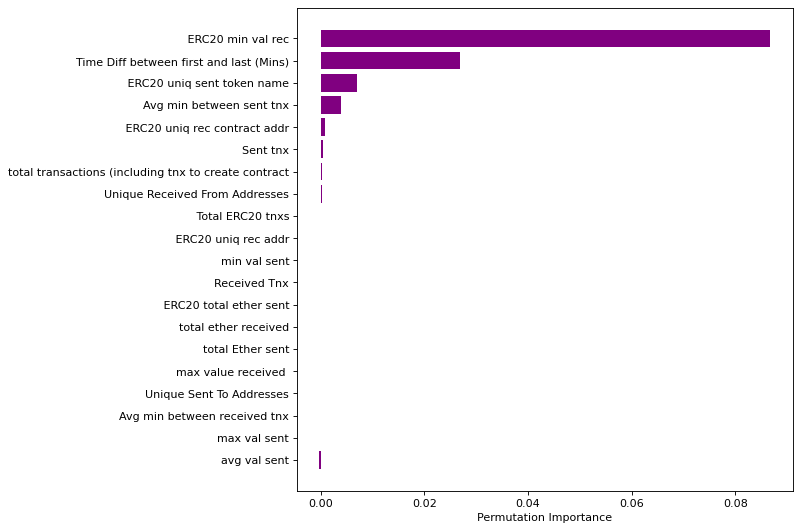

In [128]:
feature_importance(LogisticRegression,searching1,train_K20,y_train,'purple')

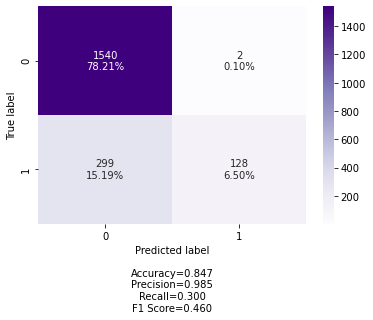

In [129]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_pred_lr1),cmap='Purples')

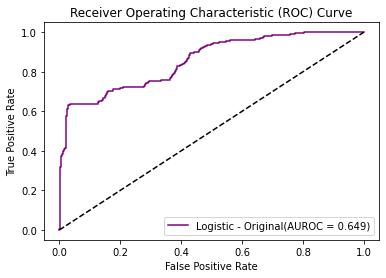

In [130]:
#ROC curve
plot_roc_curve(searching1.best_estimator_.predict_proba(X_test_K20)[:,1],AUC_lr1,'Logistic - Original(AUROC = %0.3f)' ,'purple')


### 9.1.2 Random Undersampling

In [131]:
#Predict using test values
y_pred_lr2 = searching2.best_estimator_.predict(X_test_K20)

In [132]:
#Evaluation
report_lr2 = classification_report(y_test,y_pred_lr2,output_dict=True)
metrics_lr2 = pd.DataFrame(report_lr2)
metrics_lr2

0           1  accuracy    macro avg  weighted avg
precision     0.784578    0.217882  0.453022     0.501230      0.661683
recall        0.415694    0.587822  0.453022     0.501758      0.453022
f1-score      0.543451    0.317923  0.453022     0.430687      0.494542
support    1542.000000  427.000000  0.453022  1969.000000   1969.000000

In [133]:
#AUC Curve
AUC_lr2 = roc_auc_score(y_test,y_pred_lr2)
AUC_lr2

0.5017579590361372

In [134]:
lr_mc2 = matthews_corrcoef(y_test,y_pred_lr2)
lr_mc2

0.002940746597290105

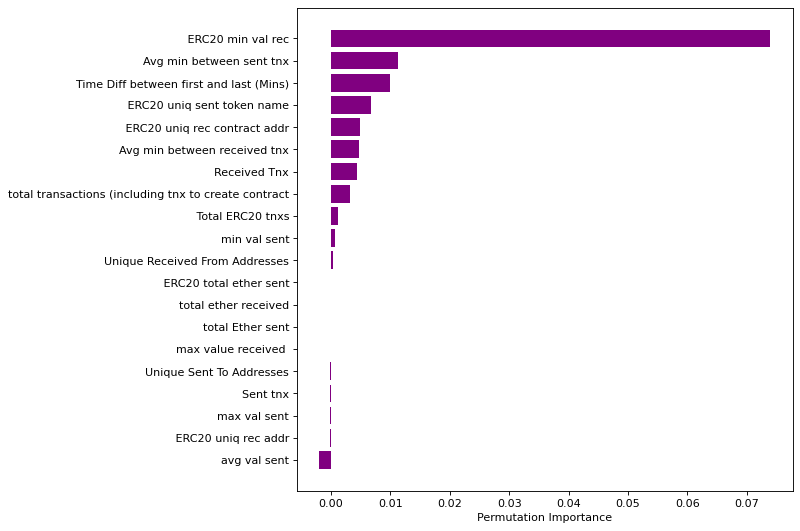

In [135]:
feature_importance(LogisticRegression,searching2,Features_under, Flag_under,'purple')

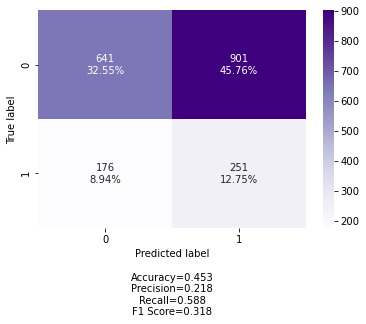

In [136]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_pred_lr2),cmap='Purples')

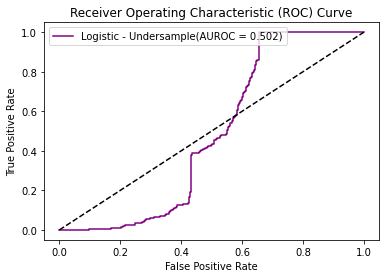

In [137]:
#ROC curve
plot_roc_curve(searching2.best_estimator_.predict_proba(X_test_K20)[:,1],AUC_lr2,'Logistic - Undersample(AUROC = %0.3f)' ,'purple')

### 9.1.3 Random Oversampling

In [138]:
#Predict using test values
y_pred_lr3 = searching3.best_estimator_.predict(X_test_K20)

In [139]:
#Evaluation
report_lr3 = classification_report(y_test,y_pred_lr3,output_dict=True)
metrics_lr3 = pd.DataFrame(report_lr3)
metrics_lr3

0           1  accuracy    macro avg  weighted avg
precision     0.839628    0.943662  0.847131     0.891645      0.862189
recall        0.994812    0.313817  0.847131     0.654315      0.847131
f1-score      0.910656    0.471002  0.847131     0.690829      0.815312
support    1542.000000  427.000000  0.847131  1969.000000   1969.000000

In [140]:
#AUC Curve
AUC_lr3 = roc_auc_score(y_test,y_pred_lr3)
AUC_lr3

0.654314631382948

In [141]:
lr_mc3 = matthews_corrcoef(y_test,y_pred_lr3)
lr_mc3

0.4916768719394639

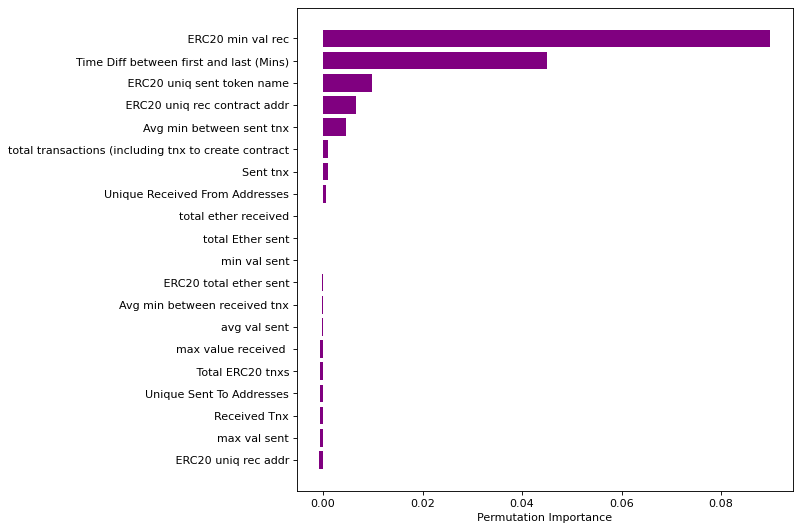

In [142]:
feature_importance(LogisticRegression,searching3,Features_over, Flag_over,'purple')

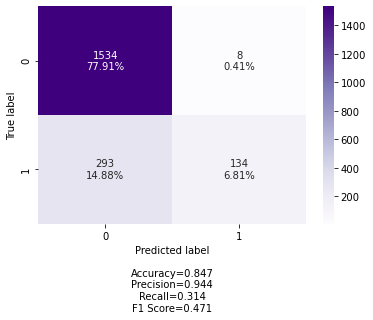

In [143]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_pred_lr3),cmap='Purples')

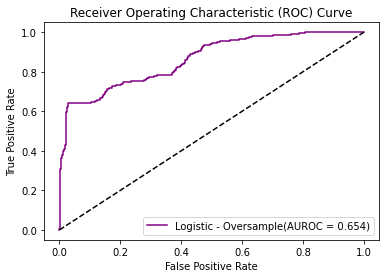

In [144]:
#ROC curve
plot_roc_curve(searching3.best_estimator_.predict_proba(X_test_K20)[:,1],AUC_lr3,'Logistic - Oversample(AUROC = %0.3f)' ,'purple')

### 9.1.4 SMOTE

In [145]:
#Predict using test values
y_pred_lr4 = searching4.best_estimator_.predict(X_test_K20)

In [146]:
#Evaluation
report_lr4 = classification_report(y_test,y_pred_lr4,output_dict=True)
metrics_lr4 = pd.DataFrame(report_lr4)
metrics_lr4

0           1  accuracy    macro avg  weighted avg
precision     0.933470    0.364919  0.647029     0.649195      0.810173
recall        0.591440    0.847775  0.647029     0.719607      0.647029
f1-score      0.724097    0.510218  0.647029     0.617158      0.677715
support    1542.000000  427.000000  0.647029  1969.000000   1969.000000

In [147]:
#AUC Curve
AUC_lr4 = roc_auc_score(y_test,y_pred_lr4)
AUC_lr4

0.7196074321799908

In [148]:
lr_mc4 = matthews_corrcoef(y_test,y_pred_lr4)
lr_mc4

0.362017892646991

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


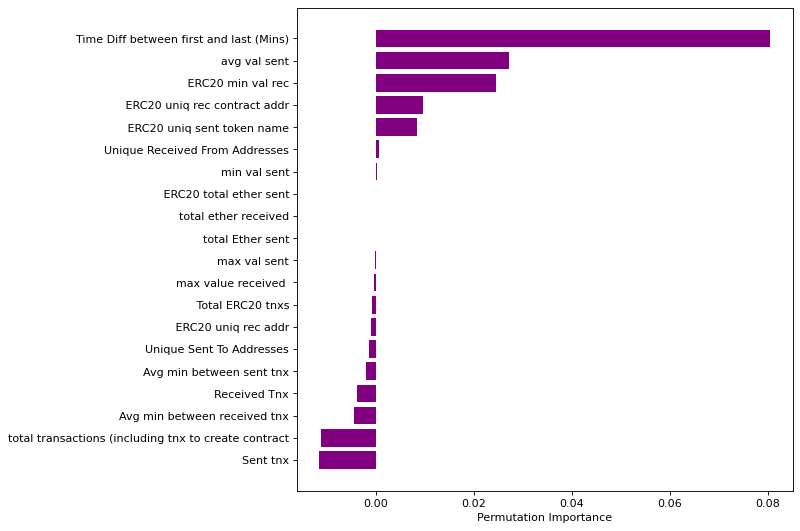

In [149]:
feature_importance(LogisticRegression,searching4,Features_smote, Flag_smote,'purple')

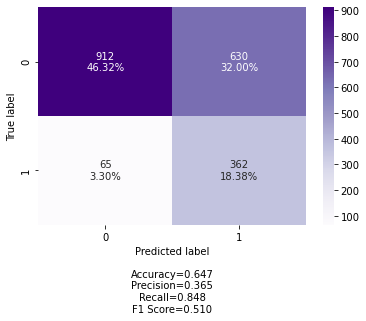

In [150]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_pred_lr4),cmap='Purples')

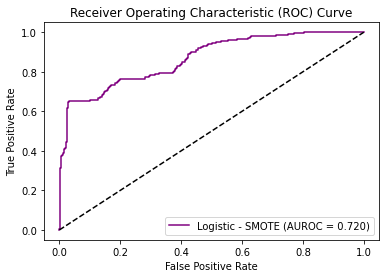

In [151]:
#ROC curve
plot_roc_curve(searching4.best_estimator_.predict_proba(X_test_K20)[:,1],AUC_lr4,'Logistic - SMOTE (AUROC = %0.3f)' ,'purple')

### 9.1.5 ADASYN

In [152]:
y_pred_lr5 = searching5.best_estimator_.predict(X_test_K20)

In [153]:
#Evaluation
report_lr5 = classification_report(y_test,y_pred_lr5,output_dict=True)
metrics_lr5 = pd.DataFrame(report_lr5)
metrics_lr5

0           1  accuracy    macro avg  weighted avg
precision     0.967662    0.344206  0.598781     0.655934      0.832458
recall        0.504540    0.939110  0.598781     0.721825      0.598781
f1-score      0.663257    0.503769  0.598781     0.583513      0.628670
support    1542.000000  427.000000  0.598781  1969.000000   1969.000000

In [154]:
#AUC Curve
AUC_lr5 = roc_auc_score(y_test,y_pred_lr5)
AUC_lr5

0.7218248146359392

In [155]:
lr_mc5 = matthews_corrcoef(y_test,y_pred_lr5)
lr_mc5

0.37196772648008614

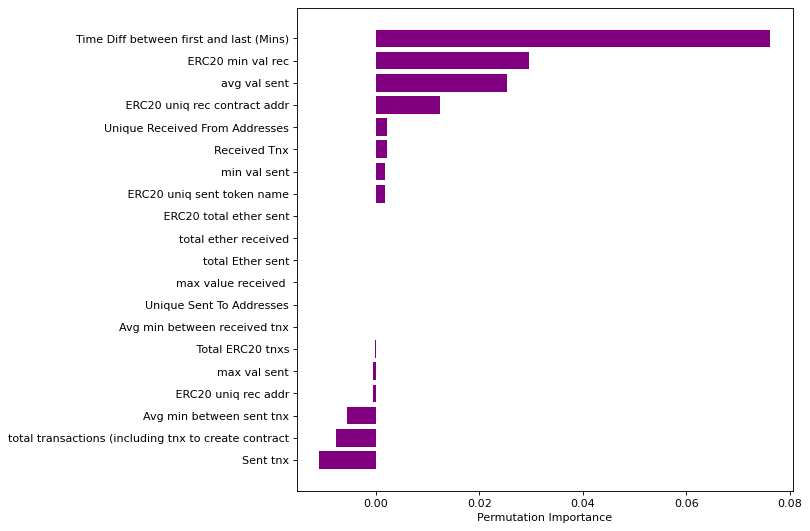

In [156]:
feature_importance(LogisticRegression,searching5,Features_adasyn, Flag_adasyn,'purple')

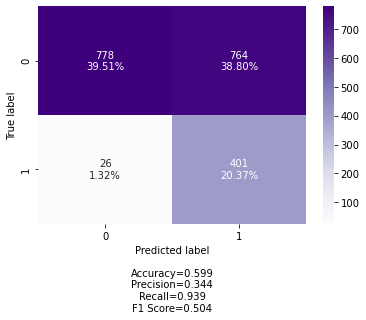

In [157]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_pred_lr5),cmap='Purples')

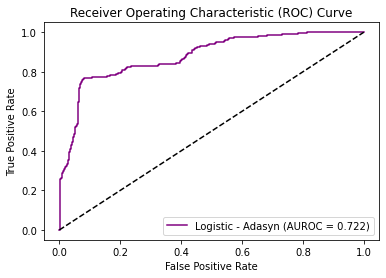

In [158]:
#ROC curve
plot_roc_curve(searching5.best_estimator_.predict_proba(X_test_K20)[:,1],AUC_lr5,'Logistic - Adasyn (AUROC = %0.3f)' ,'purple')

## 9.2 KNN

### 9.2.1 Original Set

In [159]:
#Predict using test values
y_pred_knn1 = found1.best_estimator_.predict(X_test_K20)

In [160]:
#Evaluation
report_knn1 = classification_report(y_test,y_pred_knn1,output_dict=True)
metrics_knn1 = pd.DataFrame(report_knn1)
metrics_knn1

0           1  accuracy    macro avg  weighted avg
precision     0.956941    0.871671  0.939055     0.914306      0.938449
recall        0.965629    0.843091  0.939055     0.904360      0.939055
f1-score      0.961265    0.857143  0.939055     0.909204      0.938685
support    1542.000000  427.000000  0.939055  1969.000000   1969.000000

In [161]:
#AUC Curve
AUC_knn1 = roc_auc_score(y_test,y_pred_knn1)
AUC_knn1

0.9043601940361525

In [162]:
knn_mc1 = matthews_corrcoef(y_test,y_pred_knn1)
knn_mc1

0.8186055677051883

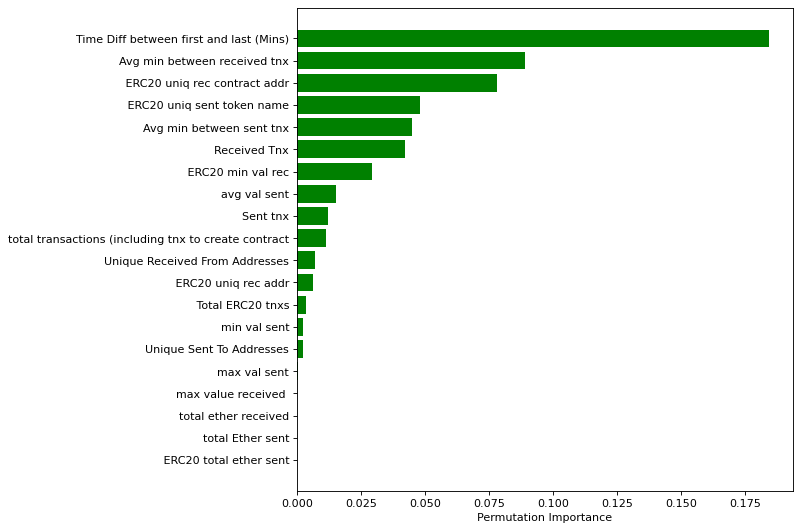

In [163]:
feature_importance(KNeighborsClassifier,found1,train_K20,y_train,'green')

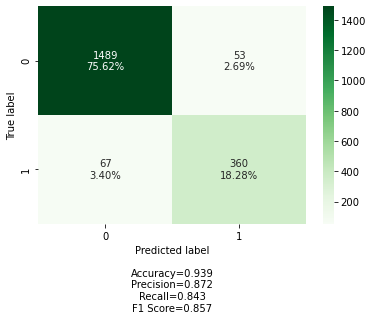

In [164]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_pred_knn1),cmap='Greens')

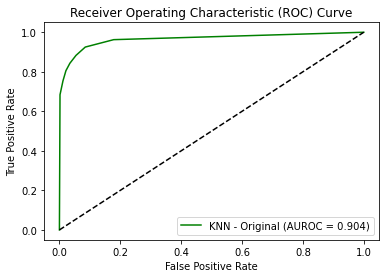

In [165]:
#ROC curve
plot_roc_curve(found1.best_estimator_.predict_proba(X_test_K20)[:,1],AUC_knn1,'KNN - Original (AUROC = %0.3f)' ,'green')

### 9.2.2 Random Undersampling

In [166]:
#Predict using test values
y_pred_knn2 = found2.best_estimator_.predict(X_test_K20) 

In [167]:
#Evaluation
report_knn2 = classification_report(y_test,y_pred_knn2,output_dict=True)
metrics_knn2 = pd.DataFrame(report_knn2)
metrics_knn2

0           1  accuracy    macro avg  weighted avg
precision     0.980108    0.293785  0.486541     0.636947      0.831272
recall        0.351492    0.974239  0.486541     0.662865      0.486541
f1-score      0.517422    0.451438  0.486541     0.484430      0.503113
support    1542.000000  427.000000  0.486541  1969.000000   1969.000000

In [168]:
#AUC Curve
AUC_knn2 = roc_auc_score(y_test,y_pred_knn2)
AUC_knn2

0.662865222634311

In [169]:
knn_mc2 = matthews_corrcoef(y_test,y_pred_knn2)
knn_mc2

0.2986897263588828

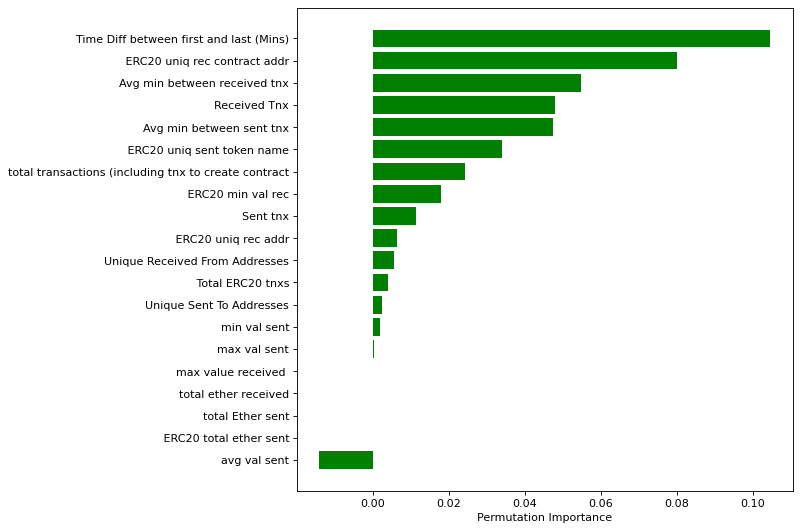

In [170]:
feature_importance(KNeighborsClassifier,found2,Features_under, Flag_under,'green')

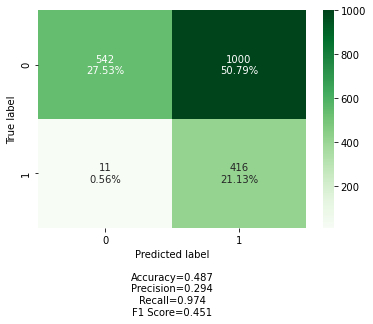

In [171]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_pred_knn2),cmap='Greens')

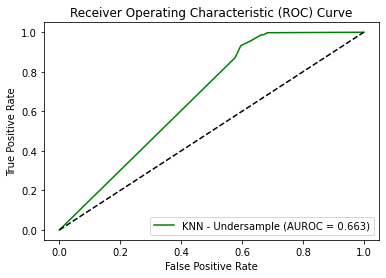

In [172]:
#ROC curve
plot_roc_curve(found2.best_estimator_.predict_proba(X_test_K20)[:,1],AUC_knn2,'KNN - Undersample (AUROC = %0.3f)' ,'green')

### 9.2.3 Random Oversampling

In [173]:
#Predict using test values
y_pred_knn3 = found3.best_estimator_.predict(X_test_K20) 

In [174]:
#Evaluation
report_knn3 = classification_report(y_test,y_pred_knn3,output_dict=True)
metrics_knn3 = pd.DataFrame(report_knn3)
metrics_knn3

0           1  accuracy    macro avg  weighted avg
precision     0.965699    0.827815  0.933977     0.896757      0.935797
recall        0.949416    0.878220  0.933977     0.913818      0.933977
f1-score      0.957489    0.852273  0.933977     0.904881      0.934671
support    1542.000000  427.000000  0.933977  1969.000000   1969.000000

In [175]:
#AUC Curve
AUC_knn3 = roc_auc_score(y_test,y_pred_knn3)
AUC_knn3

0.9138182414638368

In [176]:
knn_mc3 = matthews_corrcoef(y_test,y_pred_knn3)
knn_mc3

0.8103955530244267

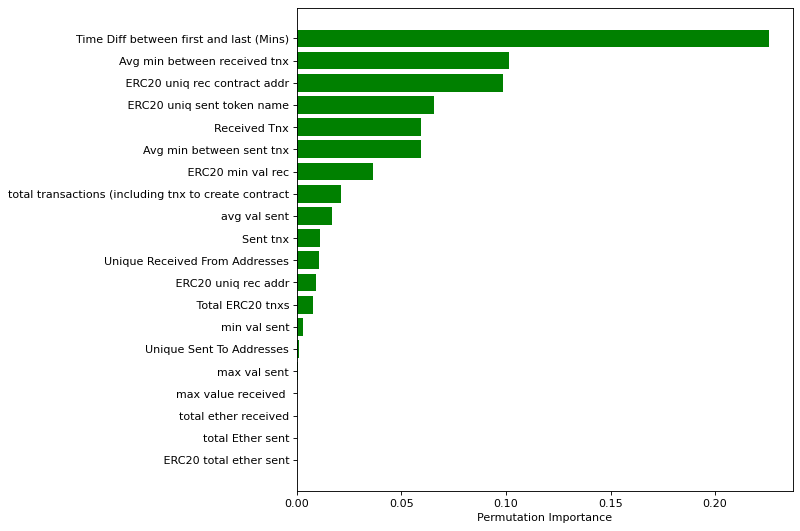

In [177]:
feature_importance(KNeighborsClassifier,found3,Features_over, Flag_over,'green')

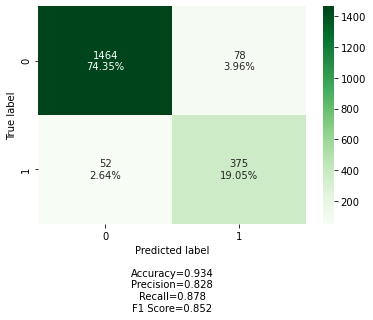

In [178]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_pred_knn3),cmap='Greens')

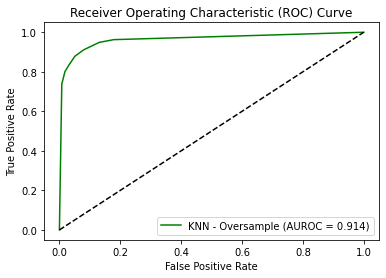

In [179]:
#ROC curve
plot_roc_curve(found3.best_estimator_.predict_proba(X_test_K20)[:,1],AUC_knn3,'KNN - Oversample (AUROC = %0.3f)' ,'green')

### 9.2.4 SMOTE

In [180]:
#Predict using test values
y_pred_knn4 = found4.best_estimator_.predict(X_test_K20) 

In [181]:
#Evaluation
report_knn4 = classification_report(y_test,y_pred_knn4,output_dict=True)
metrics_knn4 = pd.DataFrame(report_knn4)
metrics_knn4

0           1  accuracy    macro avg  weighted avg
precision     0.976093    0.776238  0.924835     0.876165      0.932752
recall        0.926719    0.918033  0.924835     0.922376      0.924835
f1-score      0.950765    0.841202  0.924835     0.895983      0.927005
support    1542.000000  427.000000  0.924835  1969.000000   1969.000000

In [182]:
#AUC Curve
AUC_knn4 = roc_auc_score(y_test,y_pred_knn4)
AUC_knn4

0.9223756671131808

In [183]:
knn_mc4 = matthews_corrcoef(y_test,y_pred_knn4)
knn_mc4

0.7972027411494489

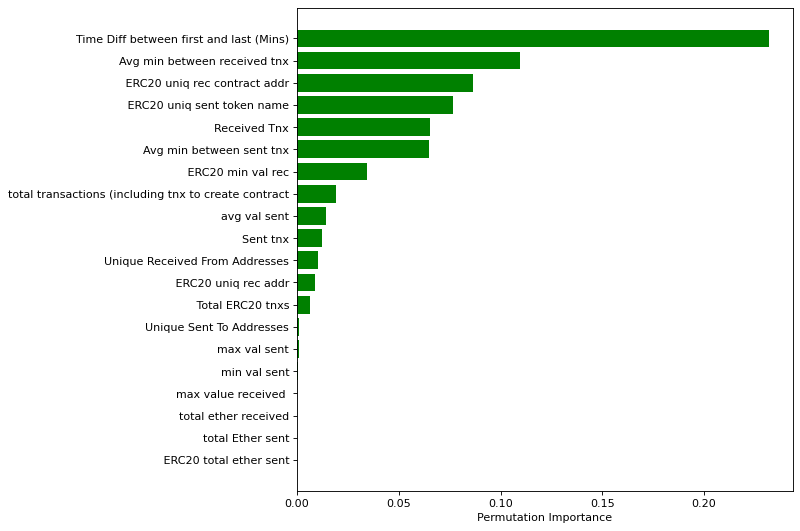

In [184]:
feature_importance(KNeighborsClassifier,found4,Features_smote, Flag_smote,'green')

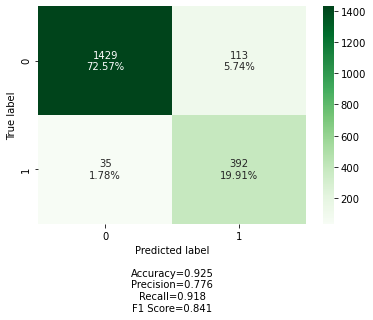

In [185]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_pred_knn4),cmap='Greens')

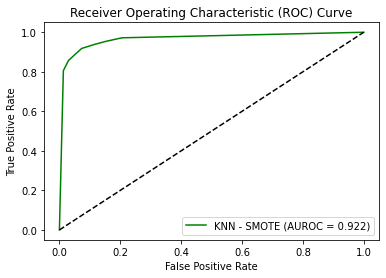

In [186]:
#ROC curve
plot_roc_curve(found4.best_estimator_.predict_proba(X_test_K20)[:,1],AUC_knn4,'KNN - SMOTE (AUROC = %0.3f)' ,'green')

### 9.2.5 ADASYN

In [187]:
#Predict using test values
y_pred_knn5 = found5.best_estimator_.predict(X_test_K20) 

In [188]:
#Evaluation
report_knn5 = classification_report(y_test,y_pred_knn5,output_dict=True)
metrics_knn5 = pd.DataFrame(report_knn5)
metrics_knn5

0           1  accuracy    macro avg  weighted avg
precision     0.983369    0.689420  0.895886     0.836395      0.919623
recall        0.881971    0.946136  0.895886     0.914054      0.895886
f1-score      0.929915    0.797631  0.895886     0.863773      0.901227
support    1542.000000  427.000000  0.895886  1969.000000   1969.000000

In [189]:
#AUC Curve
AUC_knn5 = roc_auc_score(y_test,y_pred_knn5)
AUC_knn5

0.9140536485053931

In [190]:
knn_mc5 = matthews_corrcoef(y_test,y_pred_knn5)
knn_mc5

0.7464192613046604

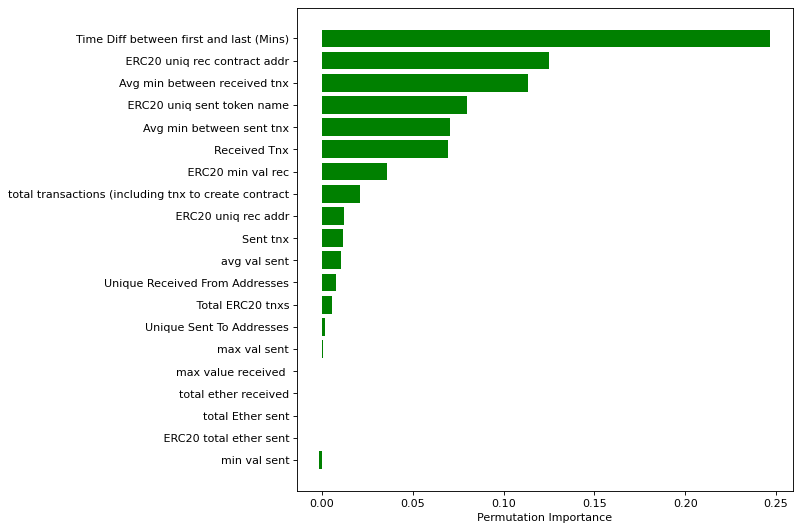

In [191]:
feature_importance(KNeighborsClassifier,found5,Features_adasyn, Flag_adasyn,'green')

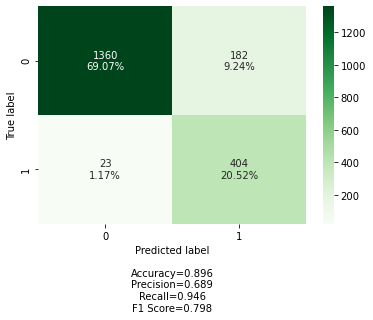

In [192]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_pred_knn5),cmap='Greens')

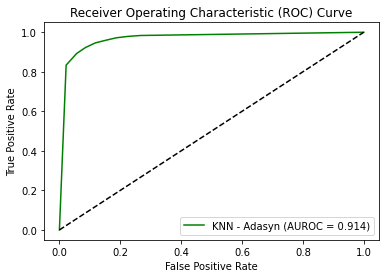

In [193]:
#ROC curve
plot_roc_curve(found5.best_estimator_.predict_proba(X_test_K20)[:,1],AUC_knn5,'KNN - Adasyn (AUROC = %0.3f)' ,'green')

## 9.4 Random Forest

### 9.4.1 Original Set

In [199]:
#Predict using test values
y_pred_rf1 = kooks1.best_estimator_.predict(X_test_K20) 

In [200]:
#Evaluation
report_rf1 = classification_report(y_test,y_pred_rf1,output_dict=True)
metrics_rf1 = pd.DataFrame(report_rf1)
metrics_rf1

0           1  accuracy    macro avg  weighted avg
precision     0.978927    0.977667  0.978669     0.978297      0.978654
recall        0.994163    0.922717  0.978669     0.958440      0.978669
f1-score      0.986486    0.949398  0.978669     0.967942      0.978443
support    1542.000000  427.000000  0.978669  1969.000000   1969.000000

In [201]:
#AUC Curve
AUC_rf1 = roc_auc_score(y_test,y_pred_rf1)
AUC_rf1

0.9584400258795871

In [202]:
rf_mc1 = matthews_corrcoef(y_test,y_pred_rf1)
rf_mc1

0.9365268790435598

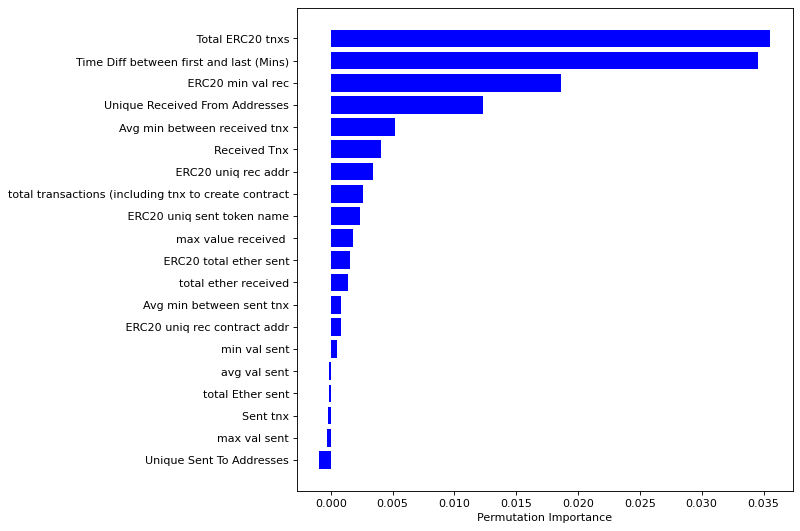

In [203]:
feature_importance(RandomForestClassifier,kooks1,train_K20,y_train,'blue')

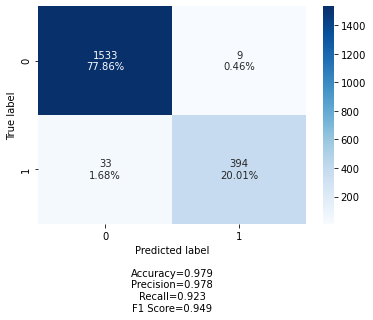

In [204]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_pred_rf1),cmap='Blues')

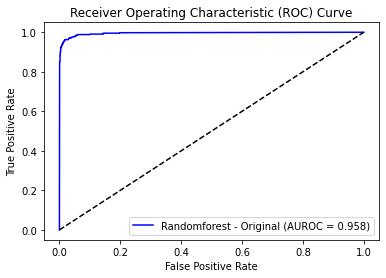

In [205]:
#ROC curve
plot_roc_curve(kooks1.best_estimator_.predict_proba(X_test_K20)[:,1],AUC_rf1,'Randomforest - Original (AUROC = %0.3f)' ,'blue')

### 9.4.2 Random Undersampling

In [206]:
#Predict using test values
y_pred_rf2 = kooks2.best_estimator_.predict(X_test_K20) 

In [207]:
#Evaluation
report_rf2 = classification_report(y_test,y_pred_rf2,output_dict=True)
metrics_rf2 = pd.DataFrame(report_rf2)
metrics_rf2

0           1  accuracy    macro avg  weighted avg
precision     0.995628    0.401328  0.677501     0.698478      0.866748
recall        0.590791    0.990632  0.677501     0.790712      0.677501
f1-score      0.741555    0.571236  0.677501     0.656395      0.704619
support    1542.000000  427.000000  0.677501  1969.000000   1969.000000

In [208]:
#AUC Curve
AUC_rf2 = roc_auc_score(y_test,y_pred_rf2)
AUC_rf2

0.7907117493932574

In [209]:
rf_mc2 = matthews_corrcoef(y_test,y_pred_rf2) 
rf_mc2

0.4804164305274472

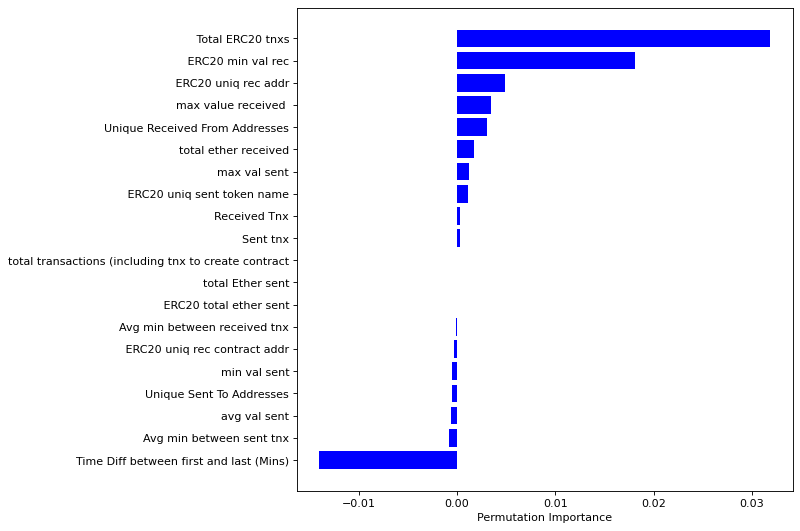

In [210]:
feature_importance(RandomForestClassifier,kooks2,Features_under, Flag_under,'blue')

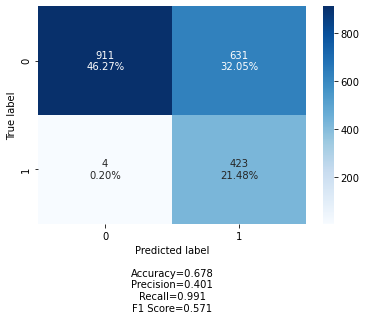

In [211]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_pred_rf2),cmap='Blues')

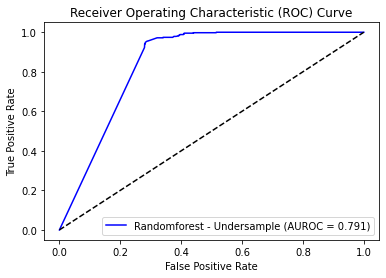

In [212]:
#ROC curve
plot_roc_curve(kooks2.best_estimator_.predict_proba(X_test_K20)[:,1],AUC_rf2,'Randomforest - Undersample (AUROC = %0.3f)' ,'blue')

### 9.4.3 Random Oversampling

In [213]:
#Predict using test values
y_pred_rf3 = kooks3.best_estimator_.predict(X_test_K20) 

In [214]:
#Evaluation
report_rf3 = classification_report(y_test,y_pred_rf3,output_dict=True)
metrics_rf3 = pd.DataFrame(report_rf3)
metrics_rf3

0           1  accuracy    macro avg  weighted avg
precision     0.982040    0.973171  0.980193     0.977605      0.980116
recall        0.992866    0.934426  0.980193     0.963646      0.980193
f1-score      0.987423    0.953405  0.980193     0.970414      0.980046
support    1542.000000  427.000000  0.980193  1969.000000   1969.000000

In [215]:
#AUC Curve
AUC_rf3 = roc_auc_score(y_test,y_pred_rf3)
AUC_rf3

0.9636463183857455

In [216]:
rf_mc3 = matthews_corrcoef(y_test,y_pred_rf3)
rf_mc3

0.9411480563383392

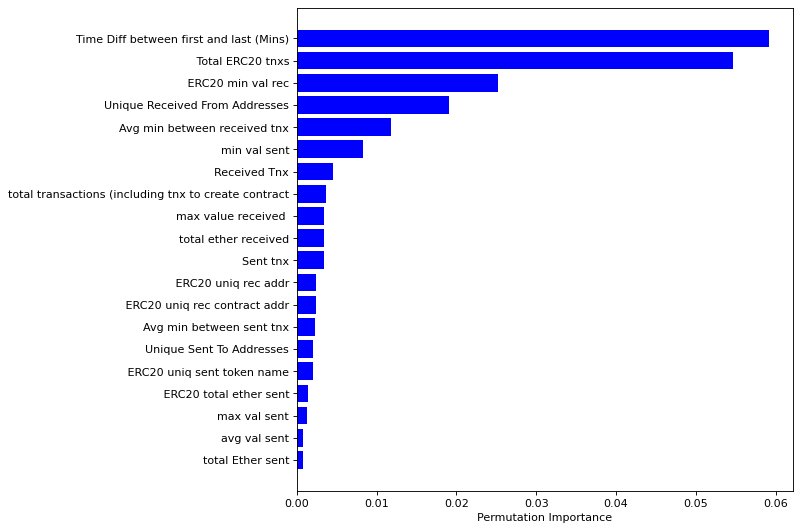

In [217]:
feature_importance(RandomForestClassifier,kooks3,Features_over, Flag_over, colour='blue')

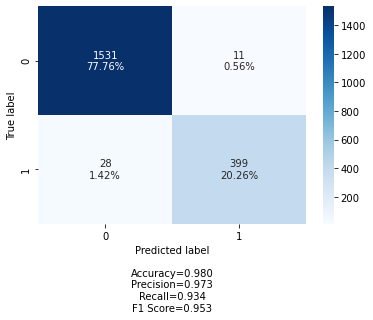

In [218]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_pred_rf3),cmap='Blues')

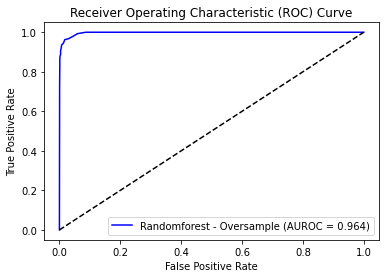

In [219]:
#ROC curve
plot_roc_curve(kooks3.best_estimator_.predict_proba(X_test_K20)[:,1],AUC_rf3,'Randomforest - Oversample (AUROC = %0.3f)' ,'blue')

### 9.4.4 SMOTE

In [220]:
#Predict using test values
y_pred_rf4 = kooks4.best_estimator_.predict(X_test_K20) 

In [221]:
#Evaluation
report_rf4 = classification_report(y_test,y_pred_rf4,output_dict=True)
metrics_rf4 = pd.DataFrame(report_rf4)
metrics_rf4

0           1  accuracy    macro avg  weighted avg
precision     0.985142    0.959620  0.979685     0.972381      0.979607
recall        0.988975    0.946136  0.979685     0.967556      0.979685
f1-score      0.987055    0.952830  0.979685     0.969943      0.979633
support    1542.000000  427.000000  0.979685  1969.000000   1969.000000

In [222]:
#AUC Curve
AUC_rf4 = roc_auc_score(y_test,y_pred_rf4)
AUC_rf4

0.967555594030685

In [223]:
rf_mc4 = matthews_corrcoef(y_test,y_pred_rf4)
rf_mc4

0.93992424321435

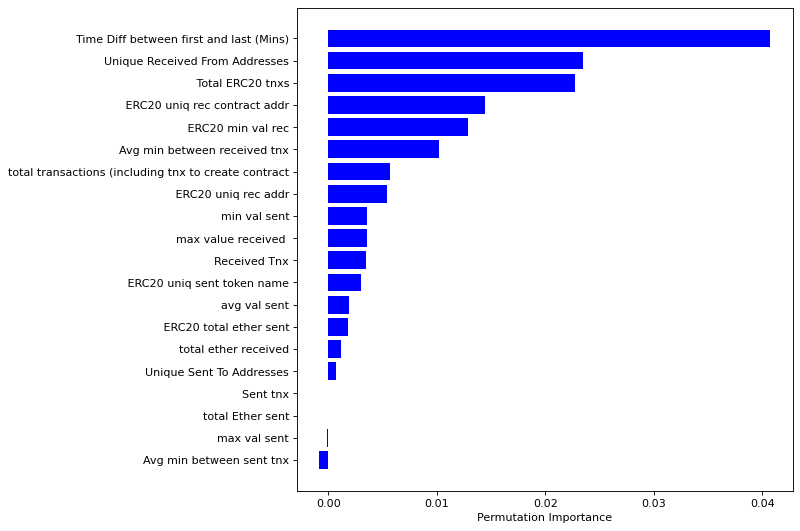

In [224]:
feature_importance(RandomForestClassifier,kooks4,Features_smote, Flag_smote, colour='blue')

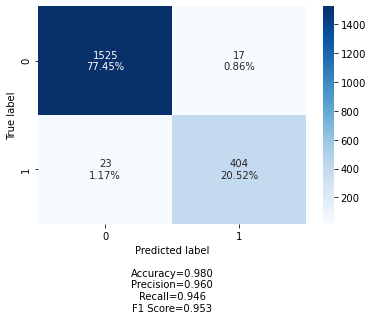

In [225]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_pred_rf4),cmap='Blues')

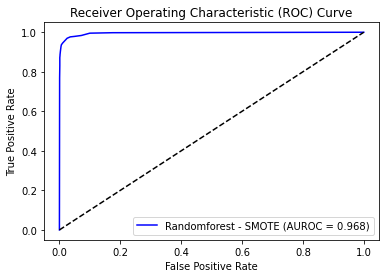

In [226]:
#ROC curve
plot_roc_curve(kooks4.best_estimator_.predict_proba(X_test_K20)[:,1],AUC_rf4,'Randomforest - SMOTE (AUROC = %0.3f)' ,'blue')

### 9.4.5 ADASYN

In [227]:
#Predict using test values
y_pred_rf5 = kooks5.best_estimator_.predict(X_test_K20) 

In [228]:
#Evaluation
report_rf5 = classification_report(y_test,y_pred_rf5,output_dict=True)
metrics_rf5 = pd.DataFrame(report_rf5)
metrics_rf5

0           1  accuracy    macro avg  weighted avg
precision     0.988911    0.940367  0.978162     0.964639      0.978383
recall        0.983139    0.960187  0.978162     0.971663      0.978162
f1-score      0.986016    0.950174  0.978162     0.968095      0.978243
support    1542.000000  427.000000  0.978162  1969.000000   1969.000000

In [229]:
#AUC Curve
AUC_rf5 = roc_auc_score(y_test,y_pred_rf5)
AUC_rf5

0.9716630672170635

In [230]:
rf_mc5 = matthews_corrcoef(y_test,y_pred_rf5)
rf_mc5

0.9362755209613839

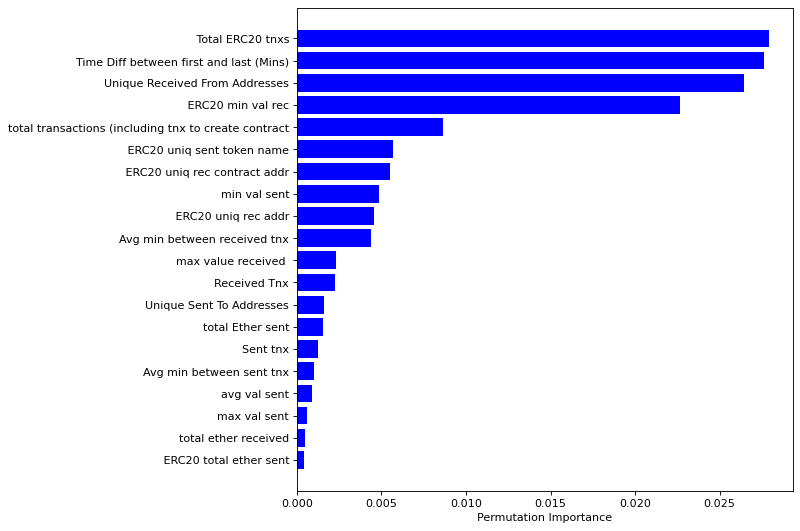

In [231]:
feature_importance(RandomForestClassifier,kooks5,Features_adasyn, Flag_adasyn, colour='blue')

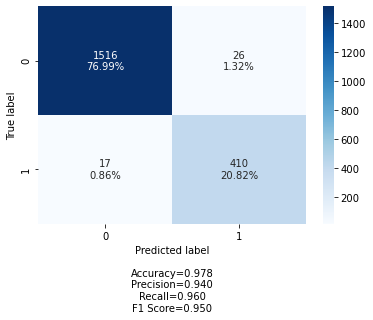

In [232]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_pred_rf5),cmap='Blues')

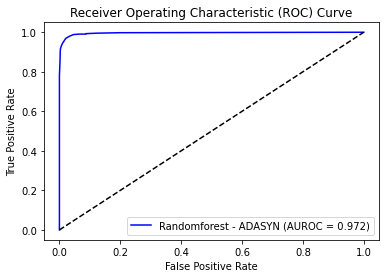

In [233]:
#ROC curve
plot_roc_curve(kooks5.best_estimator_.predict_proba(X_test_K20)[:,1],AUC_rf5,'Randomforest - ADASYN (AUROC = %0.3f)' ,'blue')

## 9.5 Stacking Classifier 

In [234]:
estimator_list = [
    ('lr',searching1.best_estimator_),
    ('knn',found1.best_estimator_),
    ('rf',kooks1.best_estimator_)]

### 9.5.1 Original Set

In [235]:
# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression())

In [236]:
# Train stacked model
stack_model.fit(train_K20, y_train)

# Make predictions
y_test_pred_stack1 = stack_model.predict(X_test_K20)

In [237]:
#Evaluation
report_stack1 = classification_report(y_test,y_test_pred_stack1 ,output_dict=True)
metrics_stack1 = pd.DataFrame(report_stack1)
metrics_stack1

0           1  accuracy    macro avg  weighted avg
precision     0.983269    0.966265  0.979685     0.974767      0.979581
recall        0.990921    0.939110  0.979685     0.965015      0.979685
f1-score      0.987080    0.952494  0.979685     0.969787      0.979580
support    1542.000000  427.000000  0.979685  1969.000000   1969.000000

In [238]:
#AUC Curve
AUC_stack1 = roc_auc_score(y_test,y_test_pred_stack1)
AUC_stack1

0.9650154761145384

In [239]:
stack_mc1 = matthews_corrcoef(y_test,y_test_pred_stack1)
stack_mc1

0.9397319036084079

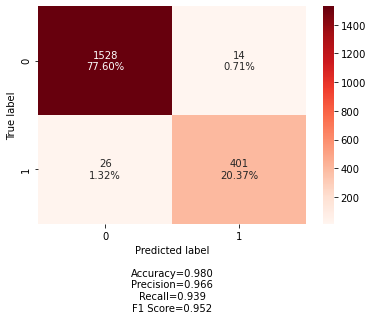

In [240]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_test_pred_stack1),cmap='Reds')

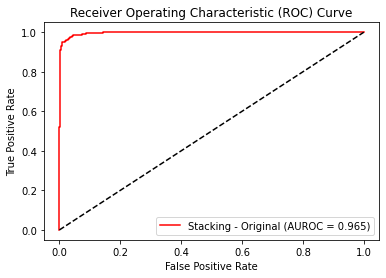

In [241]:
#ROC curve
plot_roc_curve(stack_model.predict_proba(X_test_K20)[:,1],AUC_stack1,'Stacking - Original (AUROC = %0.3f)' ,'red')

### 9.5.2 Random Undersampling

In [242]:
# Build stack model
stack_model2 = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression())

In [243]:
# Train stacked model
stack_model2.fit(Features_under, Flag_under)

# Make predictions
y_test_pred_stack2 = stack_model2.predict(X_test_K20)

In [244]:
#Evaluation
report_stack2 = classification_report(y_test,y_test_pred_stack2,output_dict=True)
metrics_stack2 = pd.DataFrame(report_stack2)
metrics_stack2

0           1  accuracy    macro avg  weighted avg
precision     0.995973    0.346405  0.592179     0.671189      0.855107
recall        0.481193    0.992974  0.592179     0.737084      0.592179
f1-score      0.648885    0.513628  0.592179     0.581257      0.619553
support    1542.000000  427.000000  0.592179  1969.000000   1969.000000

In [245]:
#AUC Curve
AUC_stack2 = roc_auc_score(y_test,y_test_pred_stack2)
AUC_stack2

0.7370837471940999

In [246]:
stack_mc2 = matthews_corrcoef(y_test,y_test_pred_stack2)
stack_mc2

0.4029202154980207

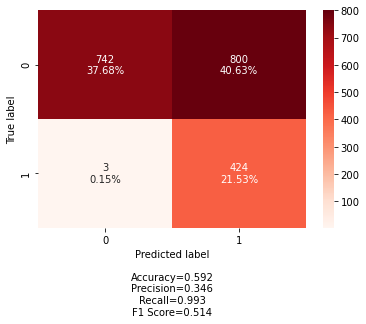

In [247]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_test_pred_stack2),cmap='Reds')

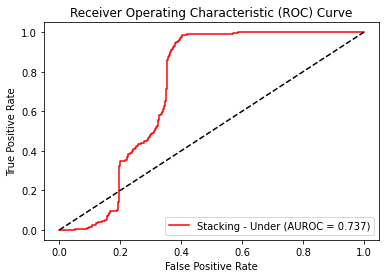

In [248]:
#ROC curve
plot_roc_curve(stack_model2.predict_proba(X_test_K20)[:,1],AUC_stack2,'Stacking - Under (AUROC = %0.3f)' ,'red')

### 9.5.3 Random Oversampling

In [249]:
# Build stack model
stack_model3 = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression())

In [250]:
# Train stacked model
stack_model3.fit(Features_over, Flag_over)

# Make predictions
y_test_pred_stack3 = stack_model3.predict(X_test_K20)

In [251]:
#Evaluation
report_stack3 = classification_report(y_test,y_test_pred_stack3,output_dict=True)
metrics_stack3 = pd.DataFrame(report_stack3)
metrics_stack3

0           1  accuracy    macro avg  weighted avg
precision     0.983301    0.973301  0.981209     0.978301      0.981133
recall        0.992866    0.939110  0.981209     0.965988      0.981209
f1-score      0.988061    0.955900  0.981209     0.971980      0.981086
support    1542.000000  427.000000  0.981209  1969.000000   1969.000000

In [252]:
#AUC Curve
AUC_stack3 = roc_auc_score(y_test,y_test_pred_stack3)
AUC_stack3

0.9659882387604528

In [253]:
stack_mc3 = matthews_corrcoef(y_test,y_test_pred_stack3)
stack_mc3

0.9442090555140189

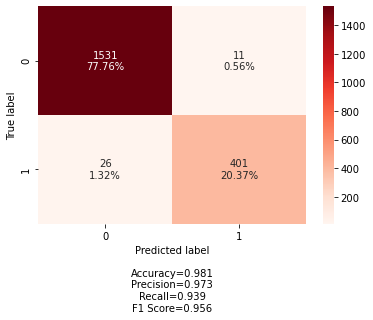

In [254]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_test_pred_stack3),cmap='Reds')

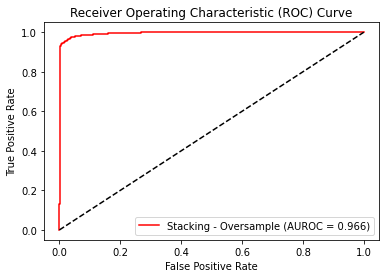

In [255]:
#ROC curve
plot_roc_curve(stack_model3.predict_proba(X_test_K20)[:,1],AUC_stack3,'Stacking - Oversample (AUROC = %0.3f)' ,'red')

### 9.5.4 SMOTE

In [256]:
# Build stack model
stack_model4 = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression())

In [257]:
# Train stacked model
stack_model4.fit(Features_smote, Flag_smote)

# Make predictions
y_test_pred_stack4 = stack_model4.predict(X_test_K20)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

In [258]:
#Evaluation
report_stack4 = classification_report(y_test,y_test_pred_stack4,output_dict=True)
metrics_stack4 = pd.DataFrame(report_stack4)
metrics_stack4

0           1  accuracy    macro avg  weighted avg
precision     0.986417    0.959811  0.980701     0.973114      0.980647
recall        0.988975    0.950820  0.980701     0.969898      0.980701
f1-score      0.987694    0.955294  0.980701     0.971494      0.980668
support    1542.000000  427.000000  0.980701  1969.000000   1969.000000

In [259]:
#AUC Curve
AUC_stack4 = roc_auc_score(y_test,y_test_pred_stack4)
AUC_stack4

0.9698975144053922

In [260]:
stack_mc4 = matthews_corrcoef(y_test,y_test_pred_stack4)
stack_mc4

0.9430057466366678

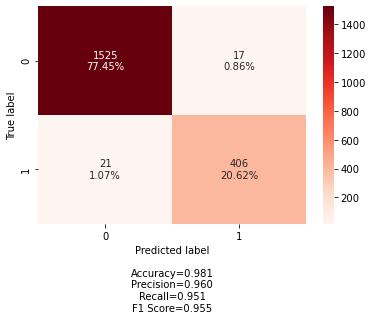

In [261]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_test_pred_stack4),cmap='Reds')

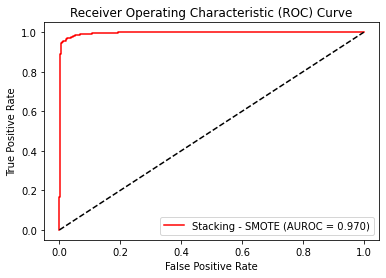

In [262]:
#ROC curve
plot_roc_curve(stack_model4.predict_proba(X_test_K20)[:,1],AUC_stack4,'Stacking - SMOTE (AUROC = %0.3f)' ,'red')

### 9.5.5 ADASYN

In [263]:
# Build stack model
stack_model5 = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression())

In [264]:
# Train stacked model
stack_model5.fit(Features_adasyn, Flag_adasyn)

# Make predictions
y_test_pred_stack5 = stack_model5.predict(X_test_K20)

In [265]:
#Evaluation
report_stack5 = classification_report(y_test,y_test_pred_stack5,output_dict=True)
metrics_stack5 = pd.DataFrame(report_stack5)
metrics_stack5

0           1  accuracy    macro avg  weighted avg
precision     0.988304    0.951163  0.980193     0.969733      0.980250
recall        0.986381    0.957845  0.980193     0.972113      0.980193
f1-score      0.987342    0.954492  0.980193     0.970917      0.980218
support    1542.000000  427.000000  0.980193  1969.000000   1969.000000

In [266]:
#AUC Curve
AUC_stack5 = roc_auc_score(y_test,y_test_pred_stack5)
AUC_stack5

0.9721133781062339

In [267]:
stack_mc5 = matthews_corrcoef(y_test,y_test_pred_stack5)
stack_mc5

0.9418438133249615

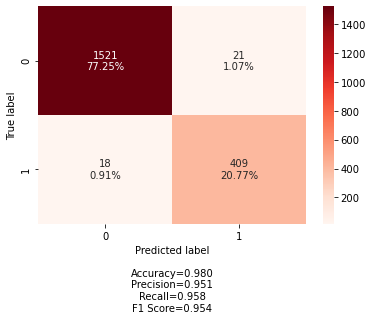

In [268]:
#Confusion Matrix
make_confusion_matrix(confusion_matrix(y_test,y_test_pred_stack5),cmap='Reds')

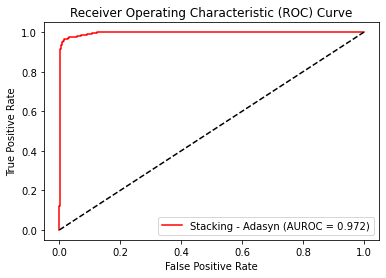

In [269]:
#ROC curve
plot_roc_curve(stack_model5.predict_proba(X_test_K20)[:,1],AUC_stack5,'Stacking - Adasyn (AUROC = %0.3f)' ,'red')

In [270]:
def plot_roc_curve(r_pred, r_auc, name, colour):
    fpr, tpr , _= roc_curve(y_test, r_pred)
    plt.plot(fpr, tpr, color=colour, label=name % r_auc)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# 10. Shapley Values

## 10.1 Original set

In [271]:
shap_values1 = shap.TreeExplainer(kooks1.best_estimator_).shap_values(train_K20)

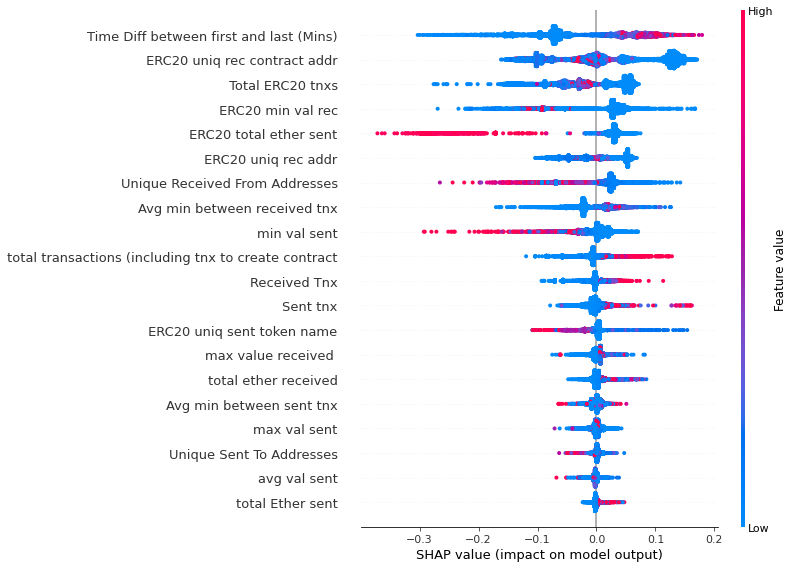

In [272]:
shap.summary_plot(shap_values1[0],train_K20,max_display=21)

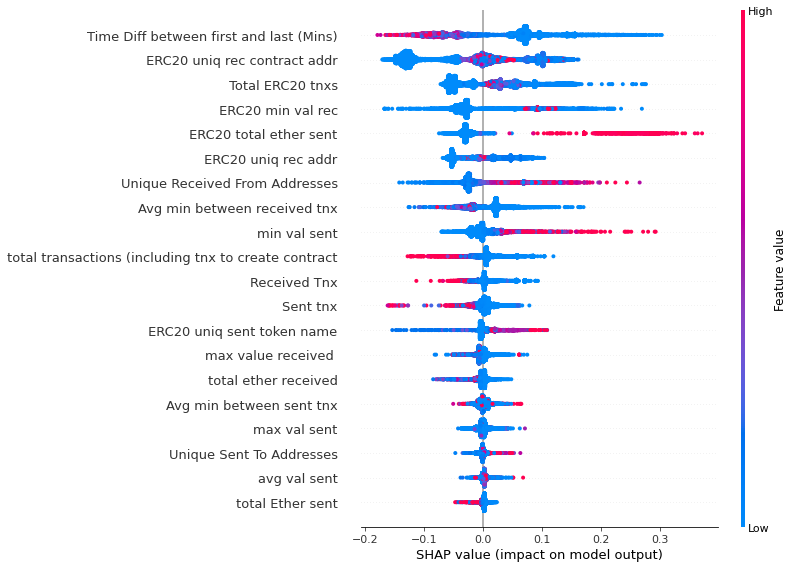

In [273]:
shap.summary_plot(shap_values1[1],train_K20,max_display=21)

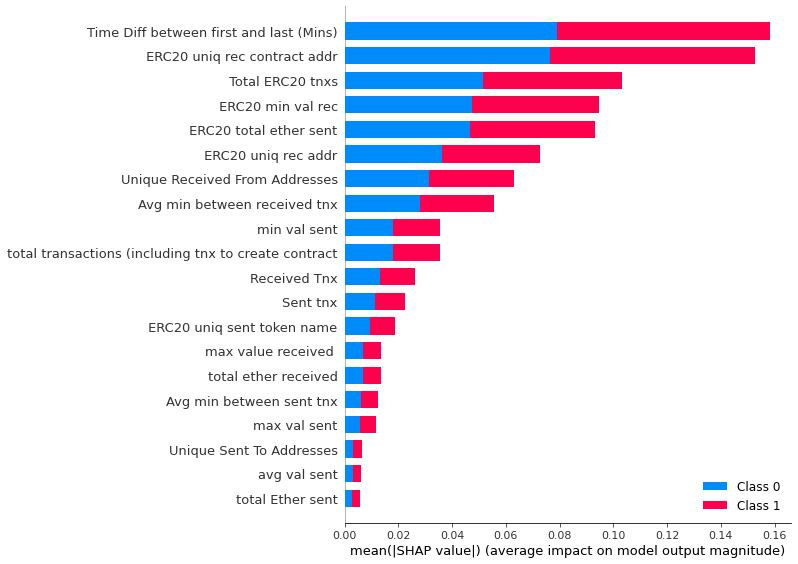

In [274]:
shap.summary_plot(shap_values1, train_K20, plot_type="bar")

## 10.2 Random Undersampling

In [275]:
shap_values2 = shap.TreeExplainer(kooks2.best_estimator_).shap_values(Features_under)

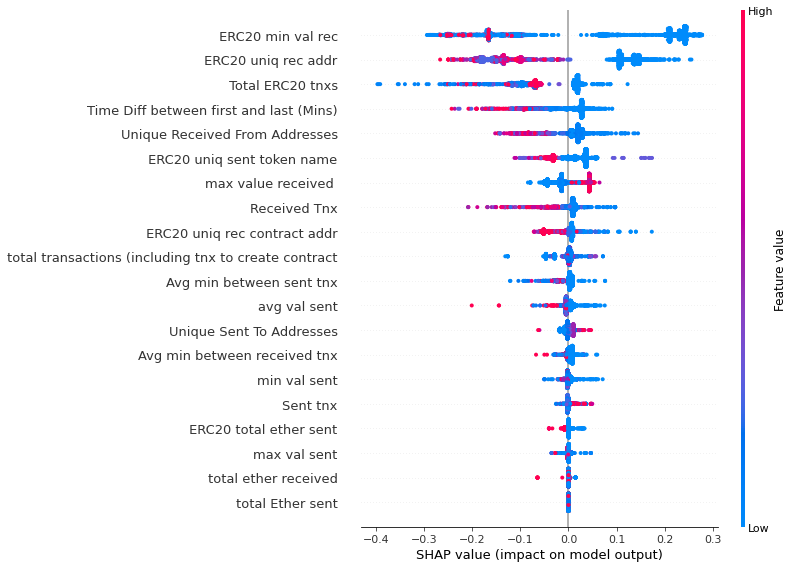

In [276]:
shap.summary_plot(shap_values2[0],Features_under,max_display=21)

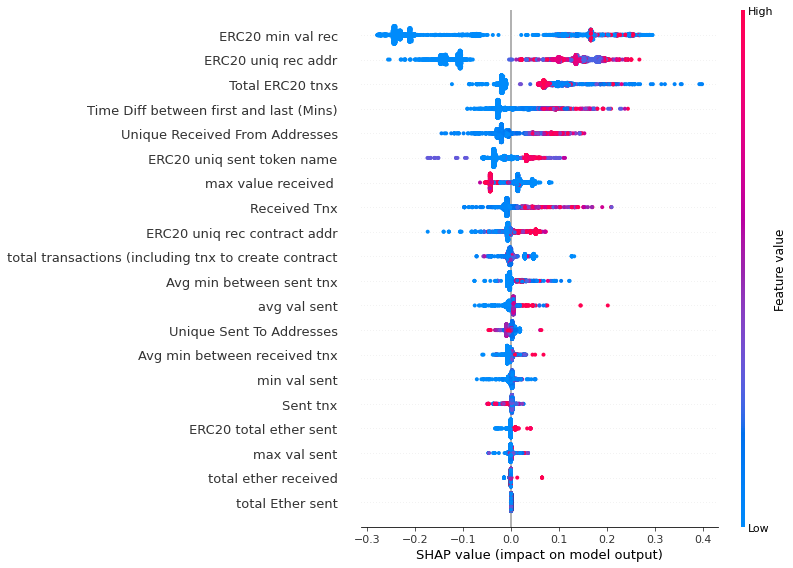

In [277]:
shap.summary_plot(shap_values2[1],Features_under,max_display=21)

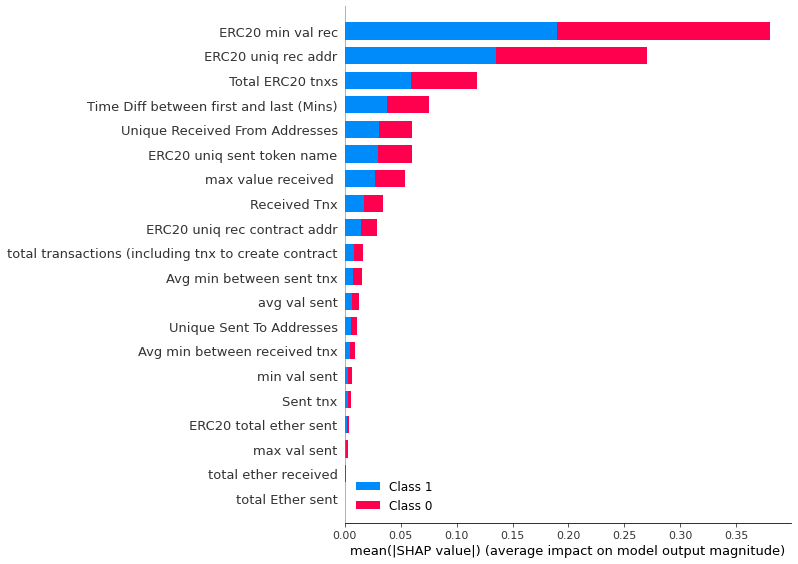

In [278]:
shap.summary_plot(shap_values2, Features_under, plot_type="bar")

## 10.3 Random Oversampling

In [279]:
shap_values3 = shap.TreeExplainer(kooks3.best_estimator_).shap_values(Features_over)

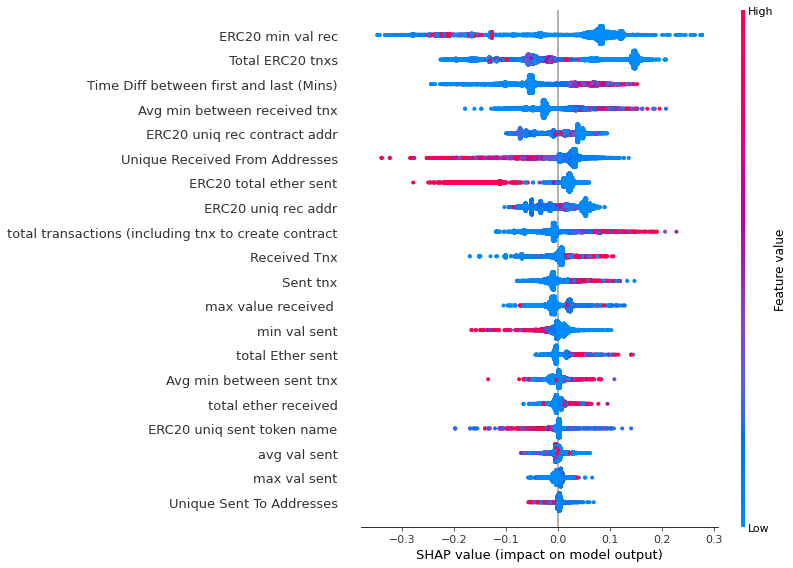

In [280]:
shap.summary_plot(shap_values3[0],Features_over,max_display=21)

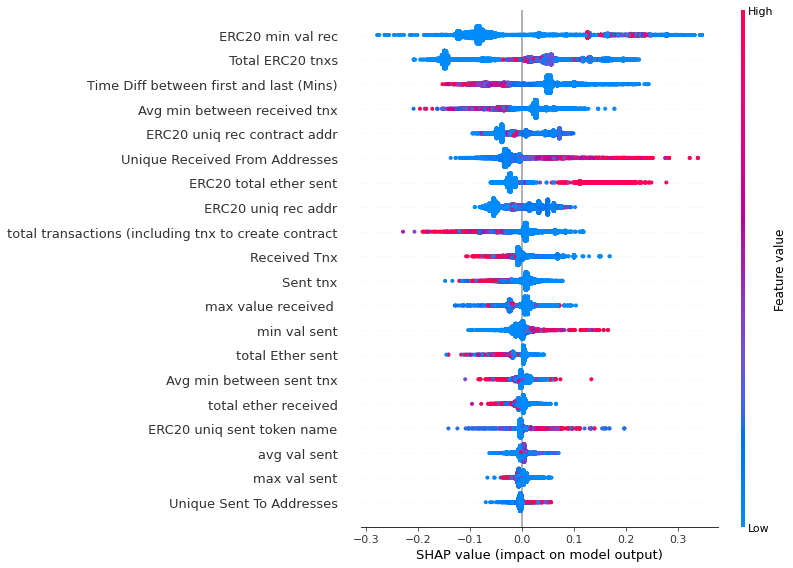

In [281]:
shap.summary_plot(shap_values3[1],Features_over,max_display=21)

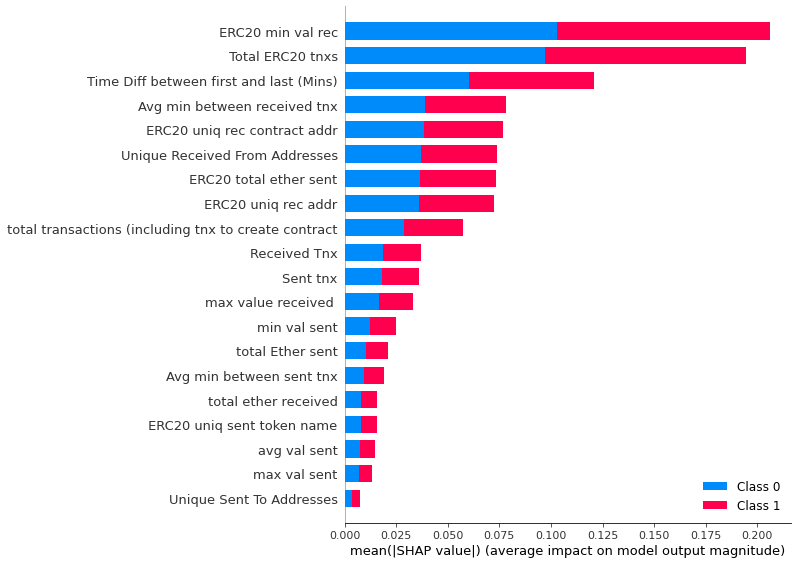

In [282]:
shap.summary_plot(shap_values3, Features_over, plot_type="bar")

## 10.4 SMOTE

In [283]:
shap_values4 = shap.TreeExplainer(kooks4.best_estimator_).shap_values(Features_smote)

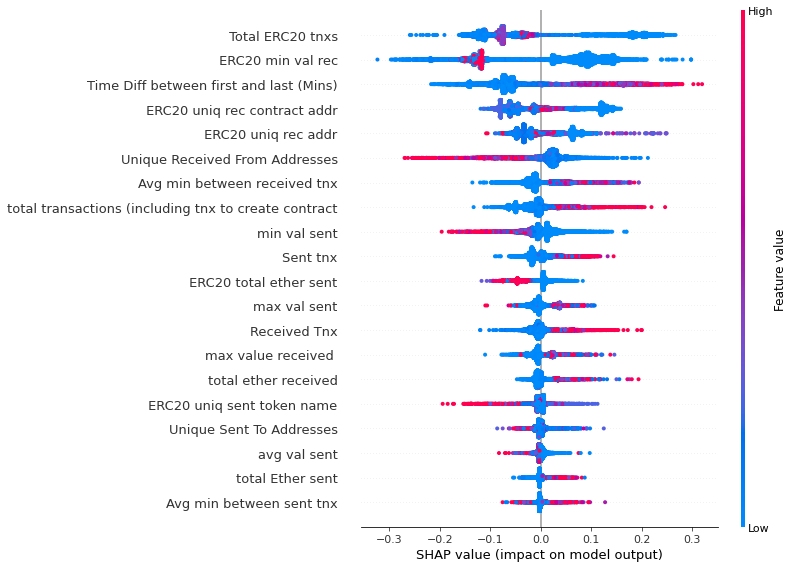

In [284]:
shap.summary_plot(shap_values4[0],Features_smote,max_display=21)

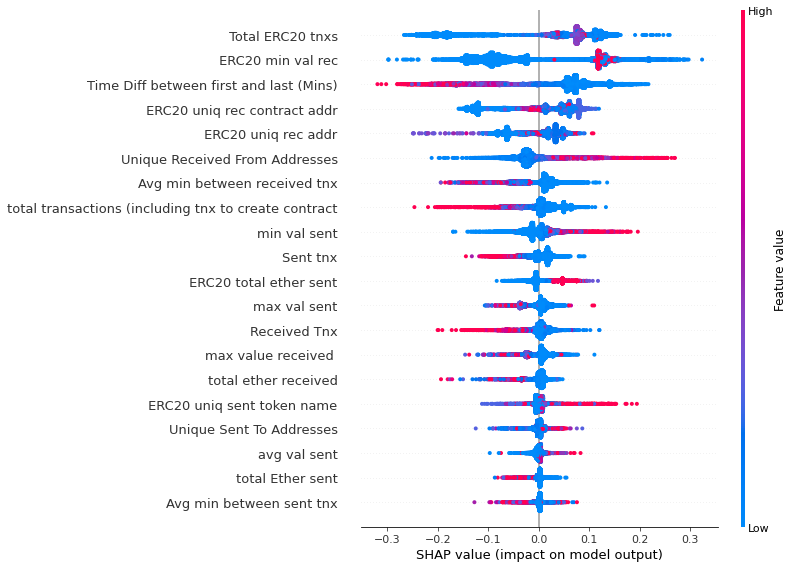

In [285]:
shap.summary_plot(shap_values4[1],Features_smote,max_display=21)

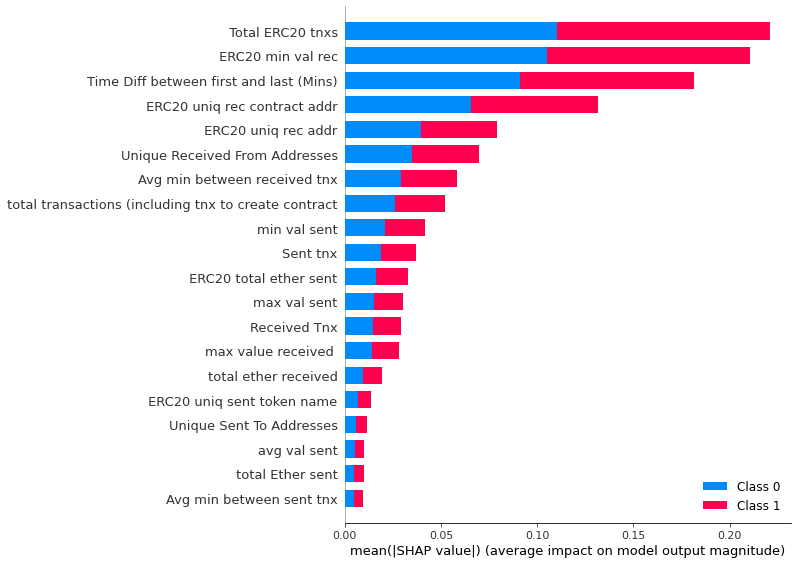

In [286]:
shap.summary_plot(shap_values4, Features_smote, plot_type="bar")

## 10.5 ADASYN 

In [287]:
shap_values5 = shap.TreeExplainer(kooks5.best_estimator_).shap_values(Features_adasyn)

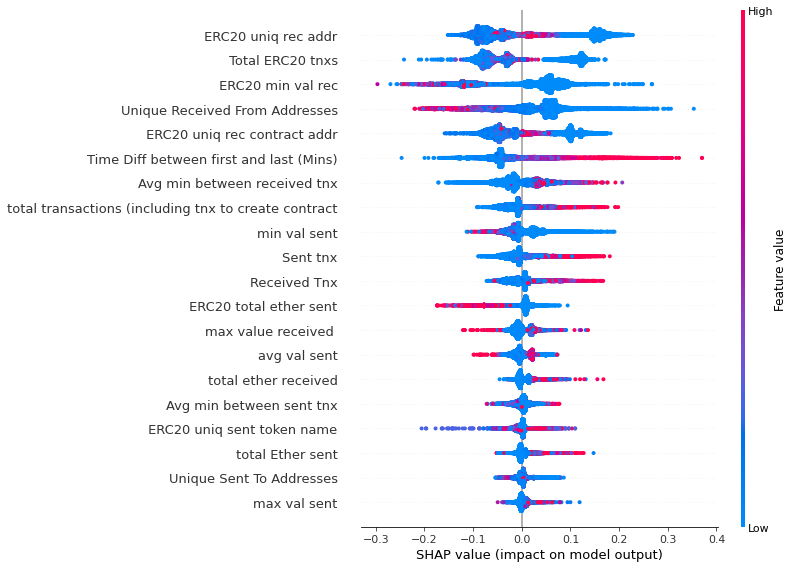

In [288]:
shap.summary_plot(shap_values5[0],Features_adasyn,max_display=21)

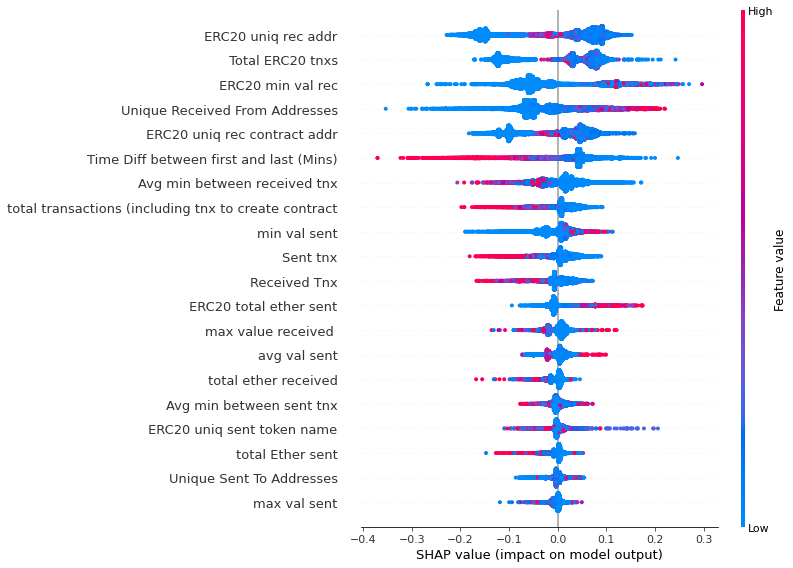

In [289]:
shap.summary_plot(shap_values5[1],Features_adasyn,max_display=21)

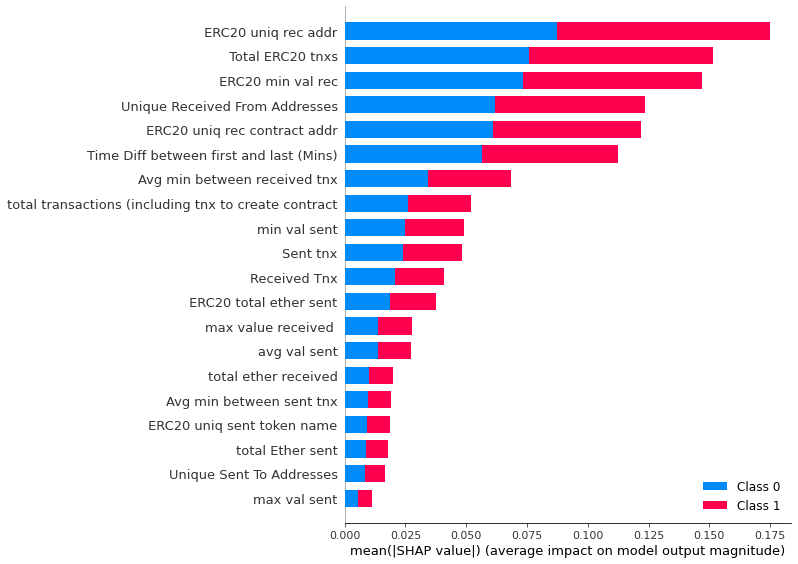

In [290]:
shap.summary_plot(shap_values5, Features_adasyn, plot_type="bar")

# 11. Threshold Selection Using ROC Curve

## 11.1 Original Set

In [291]:
log_classifier1 = searching1.best_estimator_
knn_classifier1 = found1.best_estimator_
rf_classifier1 = kooks1.best_estimator_
stack_classifier1 = stack_model

In [292]:
pred=[]
for model in [log_classifier1, knn_classifier1, rf_classifier1, stack_classifier1]:
    pred.append(pd.Series(model.predict_proba(X_test_K20)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.993466315530486


In [293]:
pd.concat(pred,axis=1)

0         1         2         3
0     0.089350  0.000000  0.644444  0.868216
1     0.273844  0.571429  1.000000  0.995381
2     0.261675  0.000000  0.000000  0.007365
3     0.265719  0.000000  0.000000  0.007365
4     0.112569  0.000000  0.000000  0.007358
...        ...       ...       ...       ...
1964  0.067639  0.714286  0.094444  0.015424
1965  0.129006  0.000000  0.000000  0.007359
1966  0.261375  0.000000  0.000000  0.007365
1967  0.157166  0.000000  0.000000  0.007360
1968  0.189018  0.285714  0.250000  0.026872

[1969 rows x 4 columns]

In [294]:
final_prediction

0       0.400503
1       0.710163
2       0.067260
3       0.068271
4       0.029982
          ...   
1964    0.222948
1965    0.034091
1966    0.067185
1967    0.041132
1968    0.187901
Length: 1969, dtype: float64

In [295]:
#### Calculate the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.99511568e+00, 9.95115683e-01, 9.82603139e-01, 9.82602553e-01,
       8.18571566e-01, 8.18569254e-01, 8.18540214e-01, 8.18512826e-01,
       8.18291264e-01, 8.18271952e-01, 7.51814490e-01, 7.51425716e-01,
       6.89296287e-01, 6.88945337e-01, 6.83970413e-01, 6.82121359e-01,
       5.29274207e-01, 5.18449382e-01, 5.03295821e-01, 4.92803521e-01,
       4.63324077e-01, 4.61976977e-01, 4.48424646e-01, 4.47426834e-01,
       4.40105638e-01, 4.30807288e-01, 4.18784227e-01, 4.03936540e-01,
       4.00502644e-01, 3.55139911e-01, 3.44437431e-01, 3.42449290e-01,
       3.34840328e-01, 3.30018525e-01, 3.24393103e-01, 3.15087412e-01,
       3.10442387e-01, 3.10075597e-01, 3.09489683e-01, 3.02296382e-01,
       2.96122660e-01, 2.91206903e-01, 2.89214271e-01, 2.86820376e-01,
       2.83670636e-01, 2.80728314e-01, 2.80425380e-01, 2.80190719e-01,
       2.75259988e-01, 2.56464772e-01, 2.54905918e-01, 2.43394573e-01,
       2.42876230e-01, 2.22868678e-01, 2.22150962e-01, 2.18576740e-01,
      

In [296]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['Thresholds', 'Accuracy']
accuracy_ls.sort_values(by='Accuracy', ascending=False, inplace=True)
accuracy_ls.head()

Thresholds  Accuracy
27    0.403937  0.980193
25    0.430807  0.979685
26    0.418784  0.979685
24    0.440106  0.979685
28    0.400503  0.979685

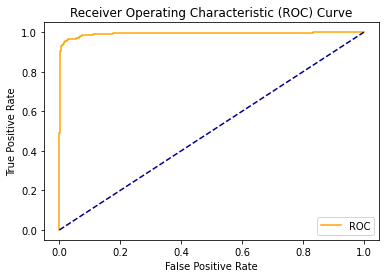

In [303]:
plot_roc_curve_thresh(fpr,tpr)

## 11.2 Random Undersampling

In [304]:
log_classifier2 = searching2.best_estimator_
knn_classifier2 = found2.best_estimator_
rf_classifier2 = kooks2.best_estimator_
stack_classifier2 = stack_model2

In [305]:
pred=[]
for model in [log_classifier2, knn_classifier2, rf_classifier2, stack_classifier2]:
    pred.append(pd.Series(model.predict_proba(X_test_K20)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.6769699013112931


In [306]:
pd.concat(pred,axis=1)

0         1     2         3
0     0.995558  1.000000  1.00  0.995670
1     0.383540  0.571429  1.00  0.961349
2     0.311632  0.000000  0.00  0.002189
3     0.312235  0.000000  0.00  0.002192
4     0.984622  1.000000  0.00  0.668371
...        ...       ...   ...       ...
1964  0.998585  1.000000  0.55  0.695778
1965  0.233712  0.857143  0.20  0.017703
1966  0.311787  0.000000  0.00  0.002190
1967  0.252695  0.571429  0.20  0.009520
1968  0.798237  1.000000  1.00  0.993589

[1969 rows x 4 columns]

In [307]:
final_prediction

0       0.997807
1       0.729079
2       0.078455
3       0.078607
4       0.663248
          ...   
1964    0.811091
1965    0.327140
1966    0.078494
1967    0.258411
1968    0.947956
Length: 1969, dtype: float64

In [308]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['Thresholds', 'Accuracy']
accuracy_ls.sort_values(by='Accuracy', ascending=False, inplace=True)
accuracy_ls.head()

Thresholds  Accuracy
0     1.995116  0.783139
10    0.751814  0.665312
11    0.751426  0.665312
4     0.818572  0.663789
5     0.818569  0.663789

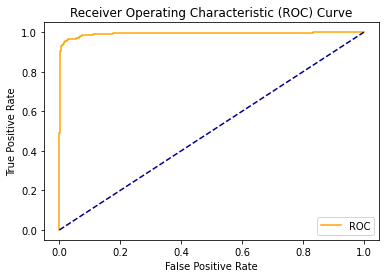

In [309]:
plot_roc_curve_thresh(fpr,tpr)

## 11.3 Random Oversampling

In [310]:
log_classifier3 = searching3.best_estimator_
knn_classifier3 = found3.best_estimator_
rf_classifier3 = kooks3.best_estimator_
stack_classifier3 = stack_model3

In [311]:
pred=[]
for model in [log_classifier3, knn_classifier3, rf_classifier3, stack_classifier3]:
    pred.append(pd.Series(model.predict_proba(X_test_K20)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.994617531901451


In [312]:
pd.concat(pred,axis=1)

0         1    2         3
0     0.148324  0.000000  0.8  0.699956
1     0.398223  0.714286  1.0  0.995951
2     0.378634  0.000000  0.0  0.002601
3     0.384692  0.000000  0.0  0.002591
4     0.174153  0.000000  0.0  0.002964
...        ...       ...  ...       ...
1964  0.115210  0.714286  0.0  0.005857
1965  0.170826  0.000000  0.0  0.002970
1966  0.378179  0.000000  0.0  0.002602
1967  0.215200  0.000000  0.0  0.002887
1968  0.290249  0.571429  0.4  0.036983

[1969 rows x 4 columns]

In [313]:
final_prediction

0       0.412070
1       0.777115
2       0.095309
3       0.096821
4       0.044279
          ...   
1964    0.208838
1965    0.043449
1966    0.095195
1967    0.054522
1968    0.324665
Length: 1969, dtype: float64

In [314]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['Thresholds', 'Accuracy']
accuracy_ls.sort_values(by='Accuracy', ascending=False, inplace=True)
accuracy_ls.head()

Thresholds  Accuracy
19    0.492804  0.982224
23    0.447427  0.981717
22    0.448425  0.981717
21    0.461977  0.981717
20    0.463324  0.981717

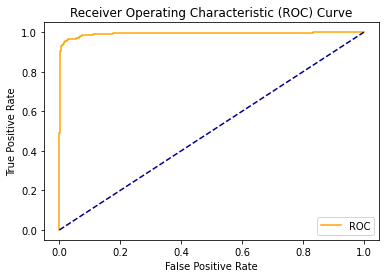

In [315]:
plot_roc_curve_thresh(fpr,tpr)

## 11.4 SMOTE

In [316]:
log_classifier4 = searching4.best_estimator_
knn_classifier4 = found4.best_estimator_
rf_classifier4 = kooks4.best_estimator_
stack_classifier4 = stack_model4

In [317]:
pred=[]
for model in [log_classifier4, knn_classifier4, rf_classifier4, stack_classifier4]:
    pred.append(pd.Series(model.predict_proba(X_test_K20)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9938444855520827


In [318]:
pd.concat(pred,axis=1)

0         1    2         3
0     0.240609  0.000000  0.8  0.973921
1     0.560546  0.714286  1.0  0.995477
2     0.535891  0.000000  0.0  0.001946
3     0.543168  0.000000  0.0  0.001925
4     0.285091  0.000000  0.0  0.002781
...        ...       ...  ...       ...
1964  0.186953  1.000000  0.0  0.036995
1965  0.251545  0.000000  0.0  0.002917
1966  0.535422  0.000000  0.0  0.001947
1967  0.317539  0.000000  0.0  0.002655
1968  0.433394  0.571429  0.2  0.188323

[1969 rows x 4 columns]

In [319]:
final_prediction

0       0.503633
1       0.817577
2       0.134459
3       0.136273
4       0.071968
          ...   
1964    0.305987
1965    0.063615
1966    0.134342
1967    0.080048
1968    0.348286
Length: 1969, dtype: float64

In [320]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['Thresholds', 'Accuracy']
accuracy_ls.sort_values(by='Accuracy', ascending=False, inplace=True)
accuracy_ls.head()

Thresholds  Accuracy
18    0.503296  0.979685
16    0.529274  0.978669
17    0.518449  0.978669
19    0.492804  0.978162
20    0.463324  0.976638

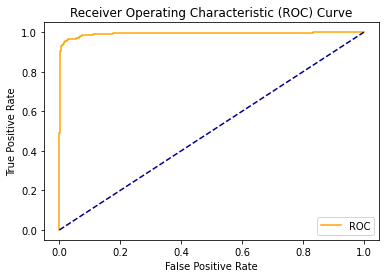

In [321]:
plot_roc_curve_thresh(fpr,tpr)

## 11.5 ADASYN

In [322]:
log_classifier5 = searching5.best_estimator_
knn_classifier5 = found5.best_estimator_
rf_classifier5 = kooks5.best_estimator_
stack_classifier5 = stack_model5

In [323]:
pred=[]
for model in [log_classifier5, knn_classifier5, rf_classifier5, stack_classifier5]:
    pred.append(pd.Series(model.predict_proba(X_test_K20)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9968182080512246


In [324]:
pd.concat(pred,axis=1)

0      1         2         3
0     0.424493  0.000  0.866667  0.983768
1     0.567084  0.750  1.000000  0.995628
2     0.549619  0.000  0.000000  0.001199
3     0.551467  0.000  0.000000  0.001194
4     0.425145  0.000  0.000000  0.001603
...        ...    ...       ...       ...
1964  0.366084  0.875  0.000000  0.021172
1965  0.443573  0.000  0.000000  0.001536
1966  0.549435  0.000  0.000000  0.001200
1967  0.470275  0.000  0.000000  0.001443
1968  0.499172  1.000  0.133333  0.082560

[1969 rows x 4 columns]

In [325]:
final_prediction

0       0.568732
1       0.828178
2       0.137705
3       0.138165
4       0.106687
          ...   
1964    0.315564
1965    0.111277
1966    0.137659
1967    0.117929
1968    0.428766
Length: 1969, dtype: float64

In [326]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['Thresholds', 'Accuracy']
accuracy_ls.sort_values(by='Accuracy', ascending=False, inplace=True)
accuracy_ls.head()

Thresholds  Accuracy
14    0.683970  0.979177
15    0.682121  0.979177
13    0.688945  0.978669
12    0.689296  0.978669
16    0.529274  0.978162

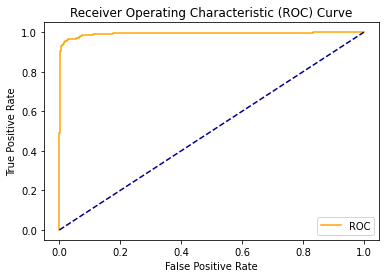

In [328]:
plot_roc_curve_thresh(fpr,tpr)

# 12. Appendix Code

In [299]:
# Confusion Matrix Function
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [300]:
def feature_importance(model, gridsearch ,training_feat, training_target, colour):
    
    the_model = model(**gridsearch.best_params_)
    the_model.fit(training_feat, training_target)

    # Permutation
    perm_importance = permutation_importance(the_model, X_test_K20, y_test)

    # Feature Names in array
    feats = np.array(list(training_feat.columns))

    #Plot Graph
    sorted_idx = perm_importance.importances_mean.argsort()
    figure(figsize=(8,8), dpi=80)
    plt.barh(feats[sorted_idx], perm_importance.importances_mean[sorted_idx],color = colour)
    plt.xlabel("Permutation Importance")

In [301]:
def plot_roc_curve(r_pred, r_auc, name, colour):
    fpr, tpr , _= roc_curve(y_test, r_pred)
    plt.plot(fpr, tpr, color=colour, label=name % r_auc)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [302]:
def plot_roc_curve_thresh(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()